<a href="https://colab.research.google.com/github/ludwigwittgenstein2/Research/blob/master/Cecil_Healthy_Communication_MICU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install bertopic



In [13]:
!pip install git+https://github.com/MaartenGr/BERTopic.git#egg=bertopic

  Cloning https://github.com/MaartenGr/BERTopic.git to /tmp/pip-install-jwvemsm0/bertopic_a3c7205c32774198962ac6a3988b29c8
  Running command git clone --filter=blob:none --quiet https://github.com/MaartenGr/BERTopic.git /tmp/pip-install-jwvemsm0/bertopic_a3c7205c32774198962ac6a3988b29c8
  Resolved https://github.com/MaartenGr/BERTopic.git to commit 641b3d04df1f7df1abd3e8dbd7ecf05385a3c48d
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [14]:
!pip install sklearn
!pip install nltk

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [15]:
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups

docs = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))['data']

topic_model = BERTopic()
topics, probs = topic_model.fit_transform(docs)

In [16]:
topic_model.get_topic_info()

Topic  Count                                    Name  \
0       -1   6804                        -1_to_the_is_and   
1        0   1818                    0_game_team_games_he   
2        1    746           1_key_encryption_clipper_chip   
3        2    526                    2_ites_cheek_yep_huh   
4        3    470              3_israel_israeli_jews_arab   
..     ...    ...                                     ...   
215    214     11           214_playback_movie_frames_fps   
216    215     10  215_xtermmap_definekey_numlock_xmodmap   
217    216     10              216_law_jesus_heaven_shall   
218    217     10        217_connector_pins_port_loopback   
219    218     10           218_610_c610_centris_problems   

                                        Representation  \
0       [to, the, is, and, of, you, for, in, it, that]   
1    [game, team, games, he, players, season, hocke...   
2    [key, encryption, clipper, chip, keys, privacy...   
3    [ites, cheek, yep, huh, ken, forget, art, why,...   
4    [israel, israeli, jews, arab, jewish, arabs, p...   
..                                                 ...   
215  [playback, movie, frames, fps, quicktime, 3202...   
216  [xtermmap, definekey, numlock, xmodmap, modifi...   
217  [law, jesus, heaven, shall, kingdom, bruise, p...   
218  [connector, pins, port, loopback, serial, pino...   
219  [610, c610, centris, problems, apple, dealer, ...   

                                   Representative_Docs  
0    [Computer Equipment Garage Sale:\n\nI've final...  
1    [\nWales Conference, Adams Division, Semifinal...  
2    [Archive-name: net-privacy/part1\nLast-modifie...  
3    [\nYep.\n, \n \n                              ...  
4    [From: Center for Policy Research <cpr>\nSubje...  
..                                                 ...  
215  [First off: Thanks to all who have filled me i...  
216  [Hi.  I've looked in the FAQ and the O-Reilly ...  
217  [\nJesus did not say that he was the fulfillme...  
218  [\n\nFrom a recent BYTE magazine i got the fol...  
219  [\n[story about dealing having problems w/C610...  

[220 rows x 5 columns]

In [17]:
import nltk

In [18]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [19]:
from bertopic import BERTopic

# Read the txt file
with open('/content/merged.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Split the text into sentences or paragraphs
# This step is crucial because BERTopic needs multiple documents
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

docs = sent_tokenize(text)

# Create and fit the BERTopic model
topic_model = BERTopic()
topics, probs = topic_model.fit_transform(docs)

# Print the topics
print(topic_model.get_topic_info())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


    Topic  Count                                              Name  \
0      -1    548                                -1_you_that_to_and   
1       0    114               0_foshee_excellent_absolutely_thats   
2       1     87                              1_you_talk_person_if   
3       2     63                     2_resident_residents_like_the   
4       3     51                            3_program_we_things_to   
5       4     50   4_profession_professions_what_interprofessional   
6       5     48                               5_smile_the_this_in   
7       6     43             6_dietitian_registered_nutrition_like   
8       7     42                             7_yeah_yes_answer_umm   
9       8     41             8_roles_responsibilities_your_teaming   
10      9     40                            9_team_members_the_our   
11     10     35                               10_monday_day_be_is   
12     11     34                      11_attend_sessions_did_those   
13     12     34    

In [20]:
from bertopic import BERTopic
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
import re

# Read the txt file
with open('/content/merged.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Get stopwords
stop_words = set(stopwords.words('english'))

# Additional words to remove
additional_stop_words = {'you', 'that', 'the', 'and', 'of', 'to', 'in', 'for', 'with', 'on'}
stop_words.update(additional_stop_words)

# Preprocess sentences
def preprocess_sentence(sentence):
    # Convert to lowercase
    sentence = sentence.lower()
    # Remove punctuation and numbers
    sentence = re.sub(r'[^a-zA-Z\s]', '', sentence)
    # Tokenize and remove stopwords
    words = sentence.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Tokenize and preprocess sentences
docs = sent_tokenize(text)
docs = [preprocess_sentence(sentence) for sentence in docs]
# Remove empty sentences
docs = [doc for doc in docs if doc.strip()]

# Create and fit the BERTopic model
topic_model = BERTopic(
    min_topic_size=5,  # Adjust this to control minimum topic size
    nr_topics='auto'   # Automatically determine number of topics
)
topics, probs = topic_model.fit_transform(docs)

# Print the topics
print(topic_model.get_topic_info())

# Visualize topics
topic_model.visualize_topics()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


    Topic  Count                                   Name  \
0      -1    385               -1_like_know_think_would   
1       0   1069               0_know_like_think_foshee   
2       1     43  1_dietitian_registered_nutrition_like   
3       2     36                2_time_day_hour_noticed   
4       3     28      3_resident_residents_happens_dont   
5       4     28               4_huc_new_coworkers_unit   
6       5     19                  5_ct_good_huc_minutes   
7       6     18              6_remember_one_cards_past   
8       7     17              7_monday_day_week_mondays   
9       8     11              8_food_snacks_bring_would   
10      9     11                   9_micu_new_open_ever   
11     10     11     10_ive_ever_repetitive_experienced   
12     11      8          11_chair_couple_add_inclusive   
13     12      8  12_rounding_opinions_teaching_concise   
14     13      8   13_investment_value_leverage_sizable   
15     14      8                   14_rt_pt_ot_happened 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning:

invalid value encountered in divide



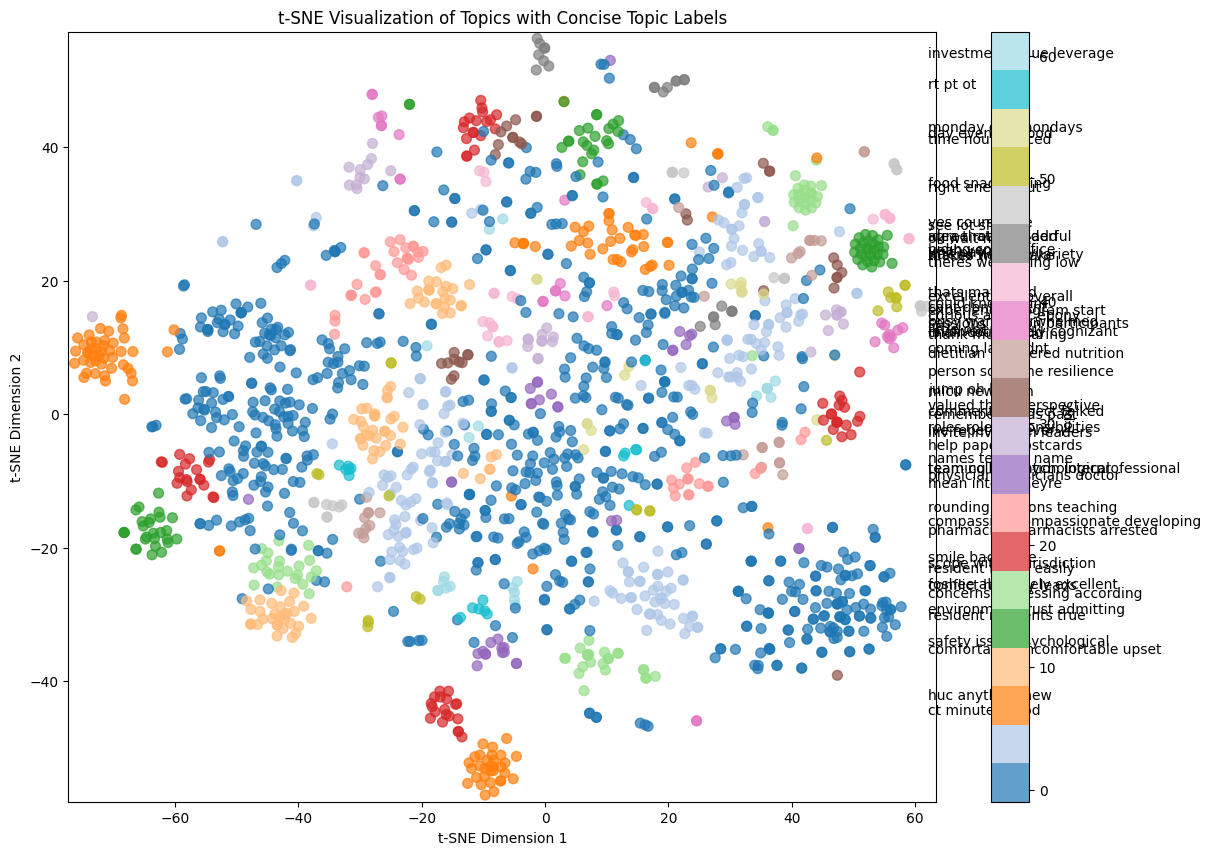

TypeError: 'int' object is not iterable

In [22]:
import nltk
from bertopic import BERTopic
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
import re
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from wordcloud import WordCloud
import numpy as np
from sentence_transformers import SentenceTransformer

# Download necessary NLTK packages
nltk.download('punkt')
nltk.download('stopwords')

# Read the txt file
with open('/content/merged.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Get stopwords
stop_words = set(stopwords.words('english'))

# Additional words to remove
additional_stop_words = {'you', 'that', 'the', 'and', 'of', 'to', 'in', 'for', 'with', 'on'}
stop_words.update(additional_stop_words)

# Preprocess sentences
def preprocess_sentence(sentence):
    """
    Function to preprocess a single sentence by:
    1. Converting to lowercase.
    2. Removing punctuation and numbers.
    3. Removing stopwords.
    """
    # Convert to lowercase
    sentence = sentence.lower()
    # Remove punctuation and numbers
    sentence = re.sub(r'[^a-zA-Z\s]', '', sentence)
    # Tokenize and remove stopwords
    words = sentence.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Tokenize and preprocess sentences
docs = sent_tokenize(text)
docs = [preprocess_sentence(sentence) for sentence in docs]

# Remove any empty or very short sentences
docs = [doc for doc in docs if doc.strip()]

# Create and fit the BERTopic model
topic_model = BERTopic(
    min_topic_size=5,  # Minimum topic size to consider
    nr_topics='auto'   # Automatically determine the number of topics
)
topics, probs = topic_model.fit_transform(docs)

# Get the topic information
topic_info = topic_model.get_topic_info()

# Get topic names from the most common words for each topic
topic_labels = {}
for topic_num in range(1, len(topic_info)):  # Skipping the -1 topic (noise topic)
    words = topic_model.get_topic(topic_num)  # Get the words for this topic
    if isinstance(words, list):  # Ensure words is a list
        topic_labels[topic_num] = " ".join([word[0] for word in words[:3]])  # Use top 3 words for concise label
    else:
        topic_labels[topic_num] = "No meaningful words"  # Handle case where no words are returned

# 1. t-SNE Visualization with Topic Labels
# Use SentenceTransformer for document embedding
embedder = SentenceTransformer('all-MiniLM-L6-v2')  # Default embedding model

# Encode documents into embeddings
document_embeddings = embedder.encode(docs)

# Apply t-SNE for dimensionality reduction and visualization
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(document_embeddings)

# Plot t-SNE visualization
plt.figure(figsize=(14, 10))
scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1],
                      c=topics, cmap='tab20', alpha=0.7, s=50)

# Define spacing for the labels and adjustments
right_side_offset = 0.15  # Space to the right of the plot
label_y_offset = 0.03  # Vertical offset for labels

# Annotate each cluster (topic) with the concise top 3 words for that topic on the right axis
for topic_num in range(1, len(topic_info)):  # Skip noise topic
    # Get the coordinates of all documents in the cluster
    cluster_indices = [i for i in range(len(topics)) if topics[i] == topic_num]
    cluster_points = reduced_embeddings[cluster_indices]

    # Find the centroid of the cluster (mean of all points in that cluster)
    centroid = np.mean(cluster_points, axis=0)

    # Place the labels slightly off the right side, with a readable font size and alignment
    plt.text(max(reduced_embeddings[:, 0]) + right_side_offset, centroid[1] + label_y_offset,
             topic_labels[topic_num],
             fontsize=10,  # Smaller font for readability
             color='black', ha='left', va='center', fontweight='normal')

# Add a color bar and labels
plt.colorbar(scatter, label='Topic')
plt.title('t-SNE Visualization of Topics with Concise Topic Labels')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

# Adjust the plot limits to provide sufficient space for labels
plt.xlim([min(reduced_embeddings[:, 0]) - 1, max(reduced_embeddings[:, 0]) + 1.5])
plt.ylim([min(reduced_embeddings[:, 1]) - 1, max(reduced_embeddings[:, 1]) + 1])

plt.show()

# Optionally, generate word clouds for each topic
for i, topic in enumerate(topic_model.get_topics()):
    if i != -1:  # Skip the noise topic
        words = dict(topic)  # Get the words for the topic
        if words:  # Ensure the topic has words
            try:
                # Create a word cloud from topic words
                wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(words)

                # Plot the word cloud
                plt.figure(figsize=(8, 8))
                plt.imshow(wordcloud, interpolation='bilinear')
                plt.title(f"Topic {i}")
                plt.axis("off")
                plt.show()
            except Exception as e:
                print(f"Could not create word cloud for topic {i}: {e}")


In [ ]:
import nltk
from bertopic import BERTopic
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
import re
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from wordcloud import WordCloud
import numpy as np

# Download necessary NLTK packages
nltk.download('punkt')
nltk.download('stopwords')

# Read the txt file
with open('/content/merged.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Get stopwords
stop_words = set(stopwords.words('english'))

# Additional words to remove
additional_stop_words = {'you', 'that', 'the', 'and', 'of', 'to', 'in', 'for', 'with', 'on'}
stop_words.update(additional_stop_words)

# Preprocess sentences
def preprocess_sentence(sentence):
    # Convert to lowercase
    sentence = sentence.lower()
    # Remove punctuation and numbers
    sentence = re.sub(r'[^a-zA-Z\s]', '', sentence)
    # Tokenize and remove stopwords
    words = sentence.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Tokenize and preprocess sentences
docs = sent_tokenize(text)
docs = [preprocess_sentence(sentence) for sentence in docs]
# Remove empty sentences
docs = [doc for doc in docs if doc.strip()]

# Create and fit the BERTopic model
topic_model = BERTopic(
    min_topic_size=5,  # Adjust this to control minimum topic size
    nr_topics='auto'   # Automatically determine number of topics
)
topics, probs = topic_model.fit_transform(docs)

# Print the topic information
print(topic_model.get_topic_info())

# Generate topic labels based on the most frequent words in each topic
topic_labels = {}
for topic_num in range(len(topic_model.get_topics())):
    words = topic_model.get_topic(topic_num)  # Get the words for this topic
    if isinstance(words, list):  # Ensure words is a valid list
        topic_labels[topic_num] = " ".join([word[0] for word in words[:5]])  # Get top 5 words as the label
    else:
        topic_labels[topic_num] = "No valid words"

# 1. Topic Distribution Visualization
try:
    topic_model.visualize_distribution(probs)
except Exception as e:
    print(f"Could not create distribution plot: {e}")

# 2. Topic Hierarchy Visualization
try:
    topic_model.visualize_hierarchy()
except Exception as e:
    print(f"Could not create hierarchy plot: {e}")

# 3. t-SNE Visualization
# Extract the underlying model that was used for embedding
if hasattr(topic_model, '_embedding_model'):
    embedder = topic_model._embedding_model
else:
    from sentence_transformers import SentenceTransformer
    embedder = SentenceTransformer('all-MiniLM-L6-v2')  # Default embedding model

# Encode documents
document_embeddings = embedder.encode(docs)

# Check if embeddings are valid
if document_embeddings is not None and len(document_embeddings) > 0:
    # t-SNE for dimensionality reduction and visualization
    tsne = TSNE(n_components=2, random_state=42)
    reduced_embeddings = tsne.fit_transform(document_embeddings)

    # Map topics to their labels for better interpretation
    topic_labels_for_plot = [topic_labels.get(topic, f"Topic {topic}") for topic in topics]

    # Plot the t-SNE visualization
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1],
                          c=topics, cmap='tab20')

    # Annotate with topic labels
    for i, label in enumerate(topic_labels_for_plot):
        if i % 100 == 0:  # Limit annotations to a subset for readability
            plt.annotate(label, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]),
                         fontsize=9, alpha=0.7)

    plt.title('t-SNE visualization of topics')
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.colorbar(scatter, label='Topic')
    plt.show()

# 4. Word Cloud for Each Topic
for i, topic in enumerate(topic_model.get_topics()):
    if i != -1:  # Skip the noise topic
        words = dict(topic)  # Get the words for the topic
        if words:  # Ensure the topic has words
            try:
                wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(words)

                # Plot the word cloud
                plt.figure(figsize=(8, 8))
                plt.imshow(wordcloud, interpolation='bilinear')
                plt.title(f"Topic {i}: {topic_labels.get(i, 'Topic Label Unknown')}")
                plt.axis("off")
                plt.show()
            except Exception as e:
                print(f"Could not create word cloud for topic {i}: {e}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


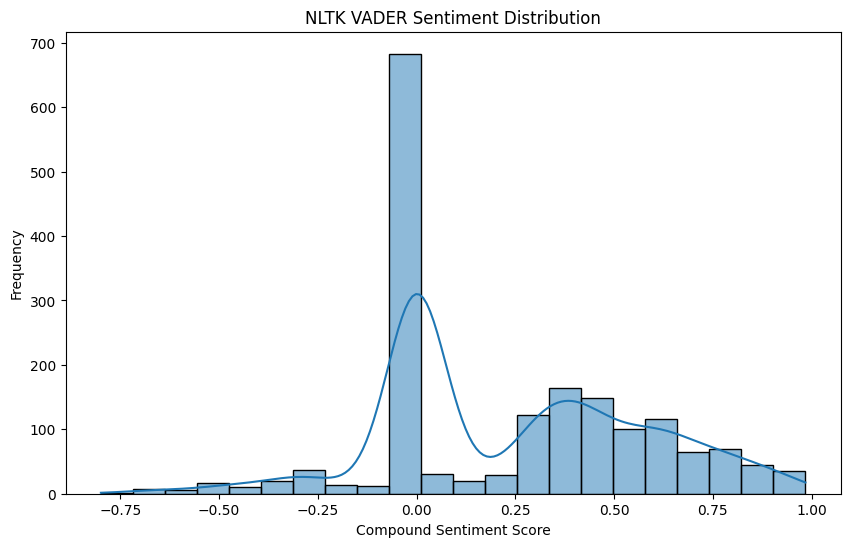

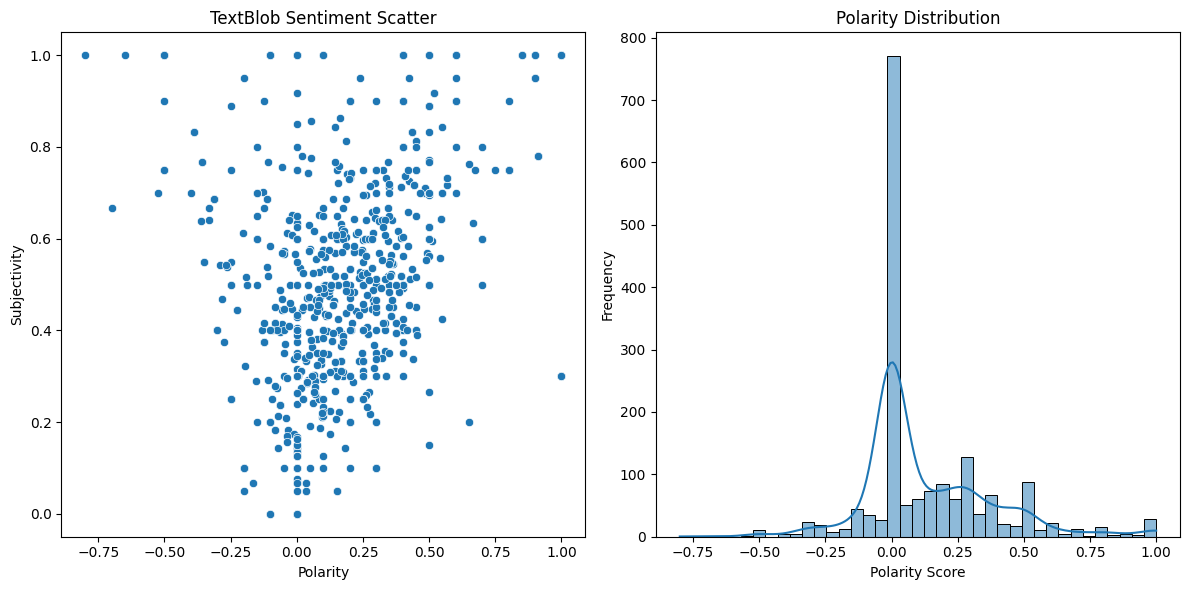


1. NLTK VADER Sentiment Summary:
          compound     positive     negative      neutral
count  1751.000000  1751.000000  1751.000000  1751.000000
mean      0.243371     0.167241     0.022688     0.810071
std       0.330493     0.218497     0.070619     0.221681
min      -0.799200     0.000000     0.000000     0.000000
25%       0.000000     0.000000     0.000000     0.711500
50%       0.226300     0.104000     0.000000     0.857000
75%       0.493900     0.260000     0.000000     1.000000
max       0.984200     1.000000     0.688000     1.000000

2. TextBlob Sentiment Summary:
          polarity  subjectivity
count  1751.000000   1751.000000
mean      0.130404      0.326525
std       0.250077      0.309732
min      -0.800000      0.000000
25%       0.000000      0.000000
50%       0.000000      0.300000
75%       0.284821      0.535714
max       1.000000      1.000000

3. Sentiment Distribution:
sentiment_category
Positive    0.533409
Neutral     0.392347
Negative    0.074243
Name:

In [42]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# NLP and Sentiment Libraries
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import spacy

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('stopwords')

# Read the txt file
with open('/content/merged.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Sentence Tokenization
sentences = nltk.sent_tokenize(text)

# 1. Basic NLTK VADER Sentiment Analysis
def nltk_sentiment_analysis(sentences):
    sia = SentimentIntensityAnalyzer()

    # Analyze sentiment for each sentence
    sentiment_results = []
    for sentence in sentences:
        sentiment_scores = sia.polarity_scores(sentence)
        sentiment_results.append({
            'sentence': sentence,
            'compound': sentiment_scores['compound'],
            'positive': sentiment_scores['pos'],
            'negative': sentiment_scores['neg'],
            'neutral': sentiment_scores['neu']
        })

    return pd.DataFrame(sentiment_results)

# 2. TextBlob Sentiment Analysis
def textblob_sentiment_analysis(sentences):
    sentiment_results = []
    for sentence in sentences:
        blob = TextBlob(sentence)
        sentiment_results.append({
            'sentence': sentence,
            'polarity': blob.sentiment.polarity,
            'subjectivity': blob.sentiment.subjectivity
        })

    return pd.DataFrame(sentiment_results)

# 3. Advanced Sentiment Analysis with Emotion Detection
def advanced_sentiment_analysis(sentences):
    # Load spaCy model with sentiment analysis capabilities
    try:
        nlp = spacy.load('en_core_web_sm')
    except OSError:
        print("Downloading spaCy model...")
        !python -m spacy download en_core_web_sm
        nlp = spacy.load('en_core_web_sm')

    sentiment_results = []
    for sentence in sentences:
        doc = nlp(sentence)

        # Basic sentiment and named entity recognition
        entities = [ent.text for ent in doc.ents]

        sentiment_results.append({
            'sentence': sentence,
            'named_entities': entities,
            'tokens': [token.text for token in doc],
            'pos_tags': [token.pos_ for token in doc]
        })

    return pd.DataFrame(sentiment_results)

# 4. Visualization Functions
def visualize_sentiment_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.histplot(df['compound'], kde=True)
    plt.title('NLTK VADER Sentiment Distribution')
    plt.xlabel('Compound Sentiment Score')
    plt.ylabel('Frequency')
    plt.show()

def visualize_textblob_sentiment(df):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.scatterplot(x='polarity', y='subjectivity', data=df)
    plt.title('TextBlob Sentiment Scatter')
    plt.xlabel('Polarity')
    plt.ylabel('Subjectivity')

    plt.subplot(1, 2, 2)
    sns.histplot(df['polarity'], kde=True)
    plt.title('Polarity Distribution')
    plt.xlabel('Polarity Score')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Perform Sentiment Analyses
nltk_sentiment_df = nltk_sentiment_analysis(sentences)
textblob_sentiment_df = textblob_sentiment_analysis(sentences)
advanced_df = advanced_sentiment_analysis(sentences)

# Visualizations
visualize_sentiment_distribution(nltk_sentiment_df)
visualize_textblob_sentiment(textblob_sentiment_df)

# Summary Statistics
print("\n1. NLTK VADER Sentiment Summary:")
print(nltk_sentiment_df[['compound', 'positive', 'negative', 'neutral']].describe())

print("\n2. TextBlob Sentiment Summary:")
print(textblob_sentiment_df[['polarity', 'subjectivity']].describe())

# Sentiment Classification
def classify_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

nltk_sentiment_df['sentiment_category'] = nltk_sentiment_df['compound'].apply(classify_sentiment)
print("\n3. Sentiment Distribution:")
print(nltk_sentiment_df['sentiment_category'].value_counts(normalize=True))

# Additional Advanced Insights
def extract_key_insights(nltk_df, textblob_df):
    insights = {
        'most_positive_sentence': nltk_df.loc[nltk_df['compound'].idxmax(), 'sentence'],
        'most_negative_sentence': nltk_df.loc[nltk_df['compound'].idxmin(), 'sentence'],
        'highest_subjectivity': textblob_df.loc[textblob_df['subjectivity'].idxmax(), 'sentence'],
        'overall_sentiment': classify_sentiment(nltk_df['compound'].mean())
    }
    return insights

key_insights = extract_key_insights(nltk_sentiment_df, textblob_sentiment_df)
print("\n4. Key Sentiment Insights:")
for key, value in key_insights.items():
    print(f"{key.replace('_', ' ').title()}: {value}")

In [ ]:
!pip install nrclex

In [ ]:
!pip install seaborn

In [ ]:
!pip install pandas
!pip install matplot

In [46]:
!pip install nrclex

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



INFO: pip is looking at multiple versions of nrclex to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nrclex: filename=NRCLex-3.0.0-py3-none-any.whl size=43308 sha256=e1639cdd7eb7fc2a98f0e0a244e5294343bbce8c4e4bde3f85a6ab88f6c18493
  Stored in directory: /root/.cache/pip/wheels/d2/10/44/6abfb1234298806a145fd6bcaec8cbc712e88dd1cd6cb242fa
Successfully built nrclex


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


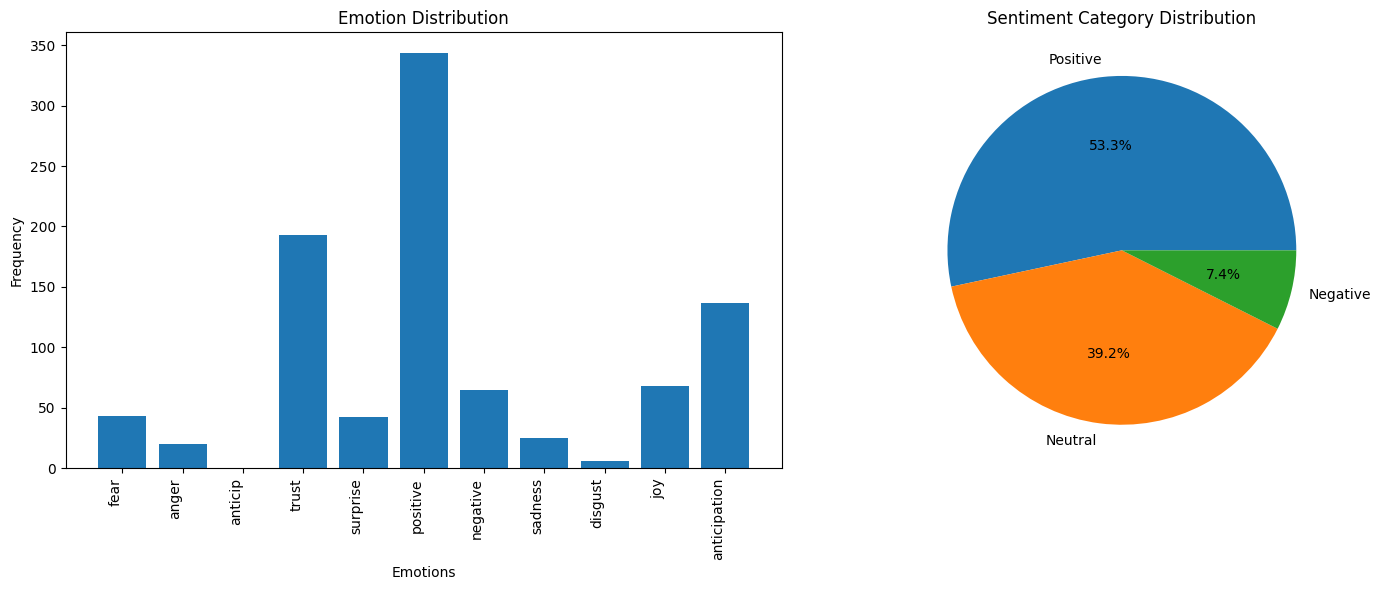


1. Advanced Emotion and Sentiment Insights:
Overall Sentiment: Positive
Average Sentiment Score: 0.2433714448886351
Top 3 Emotions: {'fear': 1398, 'anger': 1177, 'anticip': 823}
Most Emotional Sentence: ﻿Foshee: One of the things in in terms of the roles as you are thinking about, you know, it sounds like everybody understands what they are doing and what they're responsible for; What about when they are interacting with other professions, right?
Most Positive Sentence: Resident 2: You know one thing, I recognize that they have that many other members of the team they owned is that they are great listeners, they will go through all rounds with us just like almost like shadowing from like they are just present paying attention to every single detail but always focused on what is their job there and they will just add like in the end the most appropriate and like you know things that might easily fall through the cracks to like to the resident or even the fellow they will listen to ever

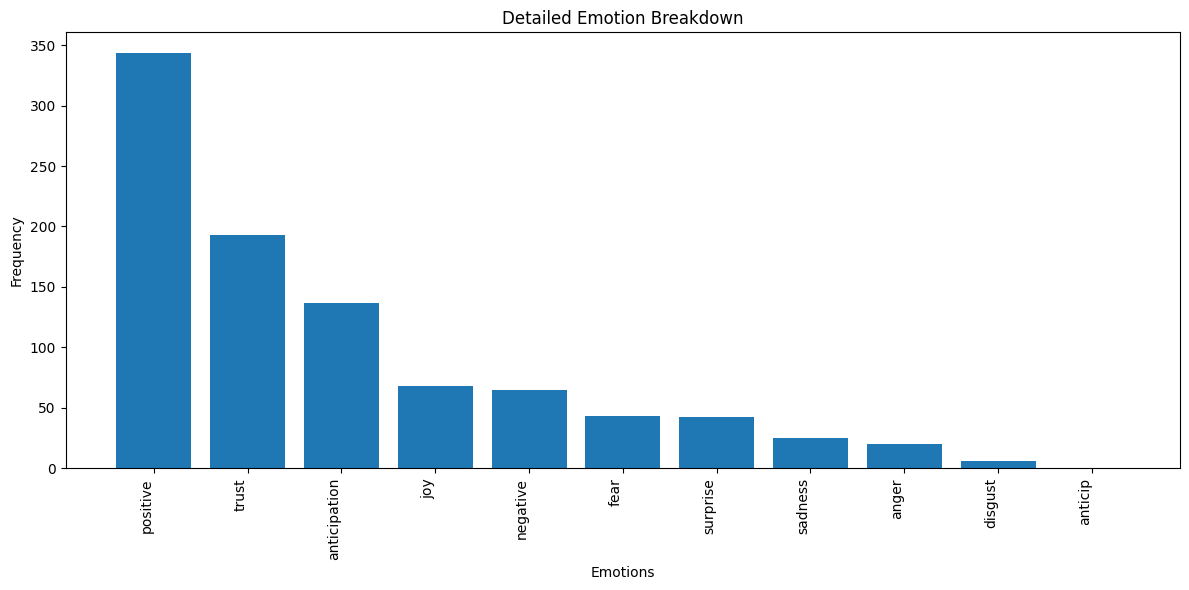

In [47]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# NLP and Sentiment Libraries
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import spacy
from collections import Counter

# Emotion Detection Libraries
from nrclex import NRCLex
import transformers

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('stopwords')

# Read the txt file
with open('/content/merged.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Sentence Tokenization
sentences = nltk.sent_tokenize(text)

# 1. Comprehensive Emotion and Sentiment Analysis
def comprehensive_emotion_analysis(sentences):
    # VADER Sentiment Analyzer
    sia = SentimentIntensityAnalyzer()

    # NRC Emotion Lexicon
    emotion_results = []

    for sentence in sentences:
        # VADER Sentiment Scores
        sentiment_scores = sia.polarity_scores(sentence)

        # NRC Emotion Lexicon
        emotion = NRCLex(sentence)

        # Emotion Breakdown (corrected method)
        emotion_counts = emotion.affect_frequencies

        # Construct comprehensive emotion analysis
        emotion_results.append({
            'sentence': sentence,
            # VADER Sentiment Scores
            'compound_sentiment': sentiment_scores['compound'],
            'positive_score': sentiment_scores['pos'],
            'negative_score': sentiment_scores['neg'],
            'neutral_score': sentiment_scores['neu'],

            # TextBlob Additional Sentiment
            'textblob_polarity': TextBlob(sentence).sentiment.polarity,
            'textblob_subjectivity': TextBlob(sentence).sentiment.subjectivity,

            # NRC Emotion Lexicon Breakdown
            'emotions': emotion_counts,
            'top_emotions': dict(sorted(emotion_counts.items(), key=lambda x: x[1], reverse=True)[:3]),

            # Sentiment Classification
            'sentiment_category': classify_sentiment(sentiment_scores['compound']),
        })

    return pd.DataFrame(emotion_results)

# Sentiment Classification Function
def classify_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# 2. Advanced Emotion Visualization
def visualize_emotions(emotion_df):
    # Aggregate emotions across all sentences
    total_emotions = {}
    for emotions in emotion_df['emotions']:
        for emotion, count in emotions.items():
            total_emotions[emotion] = total_emotions.get(emotion, 0) + count

    # Plotting Emotion Distribution
    plt.figure(figsize=(15, 6))

    # Emotion Bar Plot
    plt.subplot(1, 2, 1)
    emotions = list(total_emotions.keys())
    counts = list(total_emotions.values())
    plt.bar(emotions, counts)
    plt.title('Emotion Distribution')
    plt.xlabel('Emotions')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90, ha='right')

    # Sentiment Distribution Pie Chart
    plt.subplot(1, 2, 2)
    sentiment_counts = emotion_df['sentiment_category'].value_counts()
    plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
    plt.title('Sentiment Category Distribution')

    plt.tight_layout()
    plt.show()

# 3. Detailed Emotion and Sentiment Analysis
def advanced_emotion_insights(emotion_df):
    insights = {
        'Overall Sentiment': emotion_df['sentiment_category'].mode()[0],
        'Average Sentiment Score': emotion_df['compound_sentiment'].mean(),
        'Top 3 Emotions': dict(sorted(
            Counter([emotion for emotions in emotion_df['top_emotions'] for emotion in emotions.keys()]).items(),
            key=lambda x: x[1],
            reverse=True
        )[:3]),
        'Most Emotional Sentence': emotion_df.loc[
            emotion_df['emotions'].apply(lambda x: sum(x.values())).idxmax(),
            'sentence'
        ],
        'Most Positive Sentence': emotion_df.loc[emotion_df['compound_sentiment'].idxmax(), 'sentence'],
        'Most Negative Sentence': emotion_df.loc[emotion_df['compound_sentiment'].idxmin(), 'sentence']
    }
    return insights

# Perform Comprehensive Analysis
emotion_df = comprehensive_emotion_analysis(sentences)

# Visualizations
visualize_emotions(emotion_df)

# Advanced Insights
print("\n1. Advanced Emotion and Sentiment Insights:")
insights = advanced_emotion_insights(emotion_df)
for key, value in insights.items():
    print(f"{key}: {value}")

# Detailed Emotion Analysis
print("\n2. Emotion Distribution:")
emotion_columns = ['emotions']
emotion_analysis = emotion_df[emotion_columns]

# Aggregate emotions
total_emotions = {}
for emotions in emotion_analysis['emotions']:
    for emotion, freq in emotions.items():
        total_emotions[emotion] = total_emotions.get(emotion, 0) + freq

# Sort and print emotions
sorted_emotions = sorted(total_emotions.items(), key=lambda x: x[1], reverse=True)
print("Emotion Frequencies:")
for emotion, count in sorted_emotions:
    print(f"{emotion}: {count}")

# Sentiment Distribution
print("\n3. Sentiment Distribution:")
print(emotion_df['sentiment_category'].value_counts(normalize=True))

# Export Results (Optional)
emotion_df.to_csv('emotion_sentiment_analysis.csv', index=False)

# Detailed Emotion Breakdown Visualization
plt.figure(figsize=(12, 6))
emotions = [emotion for emotion, _ in sorted_emotions]
counts = [count for _, count in sorted_emotions]
plt.bar(emotions, counts)
plt.title('Detailed Emotion Breakdown')
plt.xlabel('Emotions')
plt.ylabel('Frequency')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [48]:
!pip install pandas numpy matplotlib seaborn nltk textblob spacy
!python -m spacy download en_core_web_sm

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 47.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import re
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
from textblob import TextBlob
import spacy

class TeamCommunicationAnalyzer:
    def __init__(self):
        # Download required NLTK data
        nltk.download('punkt')
        nltk.download('averaged_perceptron_tagger')
        # Load spaCy model
        self.nlp = spacy.load('en_core_web_sm')

        # Define pattern dictionaries
        self.communication_patterns = {
            'unhealthy_patterns': [
                'never', 'always', 'must', 'cannot', 'impossible',
                'reject', 'refuse', 'blame', 'fault', 'wrong',
                'stupid', 'incompetent', 'useless', 'terrible',
                'they always', 'you never', 'nobody ever'
            ],
            'healthy_patterns': [
                'suggest', 'perhaps', 'consider', 'think', 'feel',
                'appreciate', 'understand', 'help', 'support', 'learn',
                'improve', 'collaborate', 'together', 'we can', 'let\'s'
            ],
            'power_dynamics': [
                'must', 'should', 'have to', 'need to', 'required',
                'mandatory', 'ordered', 'commanded', 'forced', 'demanded'
            ],
            'psychological_safety': [
                'what if', 'maybe', 'could we', 'i think', 'in my opinion',
                'i feel', 'i made a mistake', 'i\'m not sure', 'help me understand',
                'what do you think'
            ]
        }

    def load_data(self, filename: str) -> str:
        """Load and preprocess the text data"""
        try:
            with open(filename, 'r', encoding='utf-8') as file:
                text = file.read()
            return text
        except FileNotFoundError:
            print(f"Error: {filename} not found. Creating sample file...")
            self.create_sample_file(filename)
            with open(filename, 'r', encoding='utf-8') as file:
                text = file.read()
            return text

    def create_sample_file(self, filename: str):
        """Create a sample conversation file"""
        sample_text = """Speaker1: I think we should consider this approach.
Speaker2: That's an interesting idea, let's explore it further.

Speaker1: I'm not sure if this will work.
Speaker2: We can try it together and see.
Speaker3: I appreciate your willingness to experiment.

Speaker1: This must be done by tomorrow!
Speaker2: I understand the urgency, but perhaps we can find a better way.
Speaker3: Let's collaborate on a solution."""

        with open(filename, 'w', encoding='utf-8') as f:
            f.write(sample_text)

    def segment_conversations(self, text: str) -> list:
        """Segment text into conversation blocks"""
        conversations = text.split('\n\n')
        return [conv.strip() for conv in conversations if conv.strip()]

    def analyze_sentiment(self, text: str) -> dict:
        """Analyze sentiment of text using TextBlob"""
        blob = TextBlob(text)
        return {
            'polarity': blob.sentiment.polarity,
            'subjectivity': blob.sentiment.subjectivity
        }

    def detect_patterns(self, text: str) -> dict:
        """Detect various communication patterns in text"""
        text_lower = text.lower()
        results = defaultdict(int)

        for category, patterns in self.communication_patterns.items():
            for pattern in patterns:
                results[category] += len(re.findall(r'\b' + re.escape(pattern) + r'\b', text_lower))

        return dict(results)

    def analyze_speaker_dynamics(self, conversations: list) -> dict:
        """Analyze speaking patterns and dynamics"""
        speaker_stats = defaultdict(lambda: {
            'message_count': 0,
            'word_count': 0,
            'avg_sentiment': 0.0,
            'interruptions': 0
        })

        for conv in conversations:
            lines = conv.split('\n')
            for line in lines:
                if ':' in line:
                    speaker, message = line.split(':', 1)
                    speaker = speaker.strip()
                    message = message.strip()

                    speaker_stats[speaker]['message_count'] += 1
                    speaker_stats[speaker]['word_count'] += len(word_tokenize(message))
                    speaker_stats[speaker]['avg_sentiment'] += TextBlob(message).sentiment.polarity

        # Calculate averages
        for speaker in speaker_stats:
            if speaker_stats[speaker]['message_count'] > 0:
                speaker_stats[speaker]['avg_sentiment'] /= speaker_stats[speaker]['message_count']

        return dict(speaker_stats)

    def create_visualizations(self, analysis_results: dict, speaker_stats: dict):
        """Create visualizations of the analysis results"""
        # 1. Communication Patterns Distribution
        plt.figure(figsize=(12, 6))
        patterns_data = analysis_results['pattern_counts']
        bars = plt.bar(list(patterns_data.keys()), list(patterns_data.values()))
        plt.title('Distribution of Communication Patterns')
        plt.xticks(rotation=45, ha='right')

        # Add value labels on bars
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height)}',
                    ha='center', va='bottom')

        plt.tight_layout()
        plt.savefig('communication_patterns.png')
        plt.close()

        # 2. Speaker Participation Plot
        plt.figure(figsize=(10, 6))
        speaker_data = pd.DataFrame.from_dict(speaker_stats, orient='index')

        x = range(len(speaker_data.index))
        plt.bar(x, speaker_data['message_count'], label='Message Count')
        plt.plot(x, speaker_data['avg_sentiment'], 'ro-', label='Avg Sentiment')

        plt.xticks(x, speaker_data.index, rotation=45, ha='right')
        plt.title('Speaker Participation and Sentiment')
        plt.legend()
        plt.tight_layout()
        plt.savefig('speaker_dynamics.png')
        plt.close()

        # 3. Healthy vs Unhealthy Patterns Ratio
        plt.figure(figsize=(8, 8))
        healthy = patterns_data.get('healthy_patterns', 0)
        unhealthy = patterns_data.get('unhealthy_patterns', 0)

        if healthy + unhealthy > 0:
            sizes = [healthy, unhealthy]
            labels = ['Healthy', 'Unhealthy']
            colors = ['lightgreen', 'lightcoral']

            plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
                   startangle=90)
            plt.axis('equal')
        else:
            plt.text(0.5, 0.5, 'No patterns detected',
                    ha='center', va='center')

        plt.title('Healthy vs Unhealthy Communication Ratio')
        plt.savefig('health_ratio.png')
        plt.close()

    def generate_report(self, analysis_results: dict, speaker_stats: dict) -> str:
        """Generate a detailed analysis report"""
        report = []
        report.append("Team Communication Analysis Report")
        report.append("=" * 30 + "\n")

        # Overall Communication Health
        total_patterns = sum(analysis_results['pattern_counts'].values())
        healthy_ratio = analysis_results['pattern_counts'].get('healthy_patterns', 0) / total_patterns if total_patterns > 0 else 0

        report.append(f"Overall Communication Health Score: {healthy_ratio:.2%}")
        report.append(f"Total Patterns Detected: {total_patterns}")

        # Pattern Distribution
        report.append("\nCommunication Pattern Distribution:")
        for pattern, count in analysis_results['pattern_counts'].items():
            report.append(f"- {pattern}: {count} instances")

        # Speaker Analysis
        report.append("\nSpeaker Participation Analysis:")
        for speaker, stats in speaker_stats.items():
            report.append(f"\n{speaker}:")
            report.append(f"- Messages: {stats['message_count']}")
            report.append(f"- Average sentiment: {stats['avg_sentiment']:.2f}")
            report.append(f"- Words per message: {stats['word_count']/stats['message_count']:.1f}")

        return "\n".join(report)

    def analyze_text(self, filename: str):
        """Main analysis function"""
        # Load and process data
        text = self.load_data(filename)
        conversations = self.segment_conversations(text)

        # Perform analyses
        pattern_counts = self.detect_patterns(text)
        speaker_stats = self.analyze_speaker_dynamics(conversations)
        sentiment_analysis = self.analyze_sentiment(text)

        # Compile results
        analysis_results = {
            'pattern_counts': pattern_counts,
            'sentiment': sentiment_analysis
        }

        # Generate visualizations and report
        self.create_visualizations(analysis_results, speaker_stats)
        report = self.generate_report(analysis_results, speaker_stats)

        # Save report
        with open('analysis_report.txt', 'w') as f:
            f.write(report)

        return analysis_results, speaker_stats, report

def main():
    # Create analyzer instance
    analyzer = TeamCommunicationAnalyzer()

    # Run analysis
    results, speaker_stats, report = analyzer.analyze_text('merged.txt')

    # Print report
    print("\nANALYSIS REPORT:")
    print("=" * 50)
    print(report)
    print("\nAnalysis complete! Generated files:")
    print("- analysis_report.txt")
    print("- communication_patterns.png")
    print("- speaker_dynamics.png")
    print("- health_ratio.png")

if __name__ == "__main__":
    main()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.



ANALYSIS REPORT:
Team Communication Analysis Report

Overall Communication Health Score: 49.90%
Total Patterns Detected: 960

Communication Pattern Distribution:
- unhealthy_patterns: 85 instances
- healthy_patterns: 479 instances
- power_dynamics: 71 instances
- psychological_safety: 325 instances

Speaker Participation Analysis:

﻿Foshee:
- Messages: 8
- Average sentiment: 0.22
- Words per message: 55.8

APP2:
- Messages: 2
- Average sentiment: 0.22
- Words per message: 112.0

Foshee:
- Messages: 157
- Average sentiment: 0.19
- Words per message: 81.0

APP1:
- Messages: 2
- Average sentiment: 0.25
- Words per message: 188.0

APP3:
- Messages: 1
- Average sentiment: 0.31
- Words per message: 118.0

Chair:
- Messages: 10
- Average sentiment: 0.25
- Words per message: 112.2

[Foshee Comment:
- Messages: 2
- Average sentiment: 0.50
- Words per message: 13.0

Pharmacist Leader:
- Messages: 2
- Average sentiment: 0.05
- Words per message: 169.0

Physician 1:
- Messages: 1
- Average sentim

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Messages length: 393
Participants length: 393


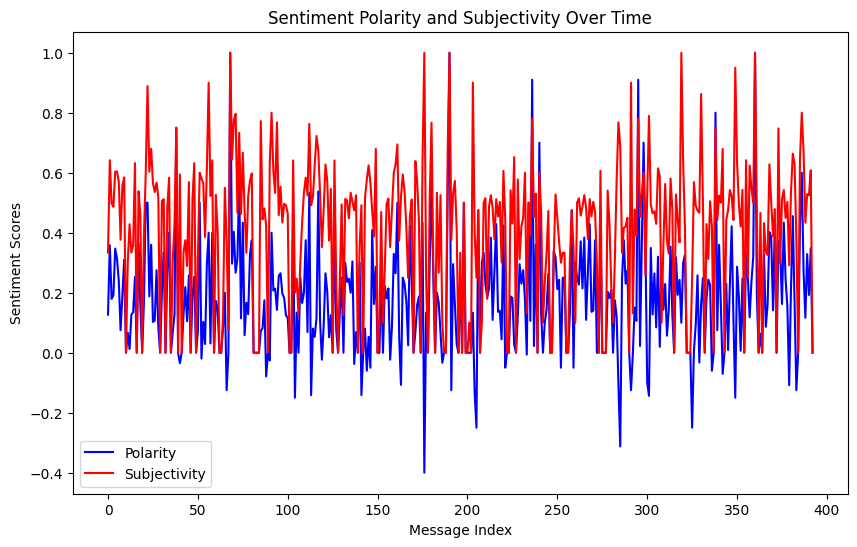

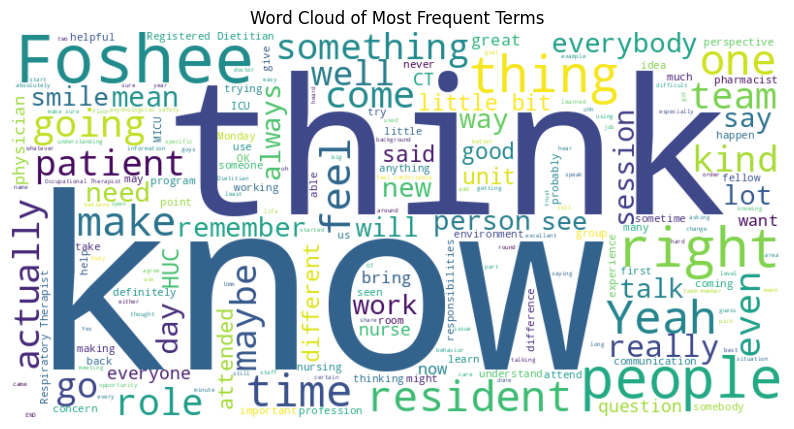

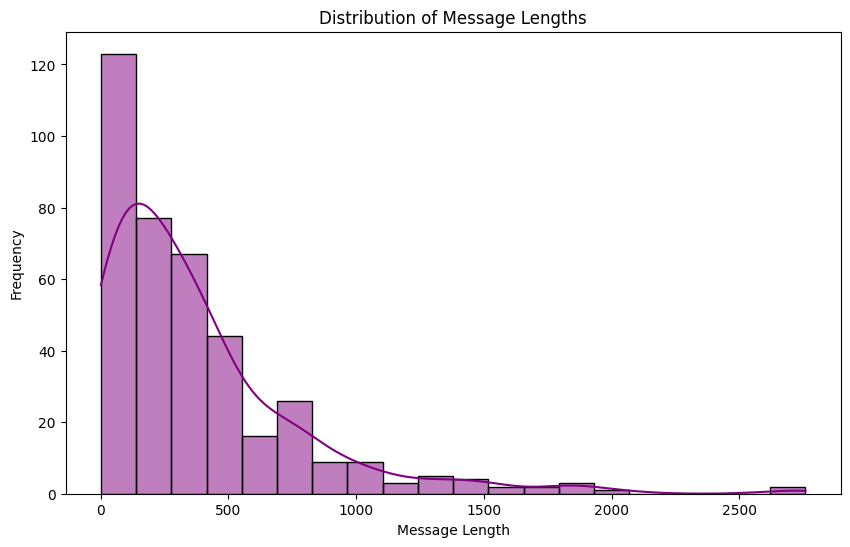

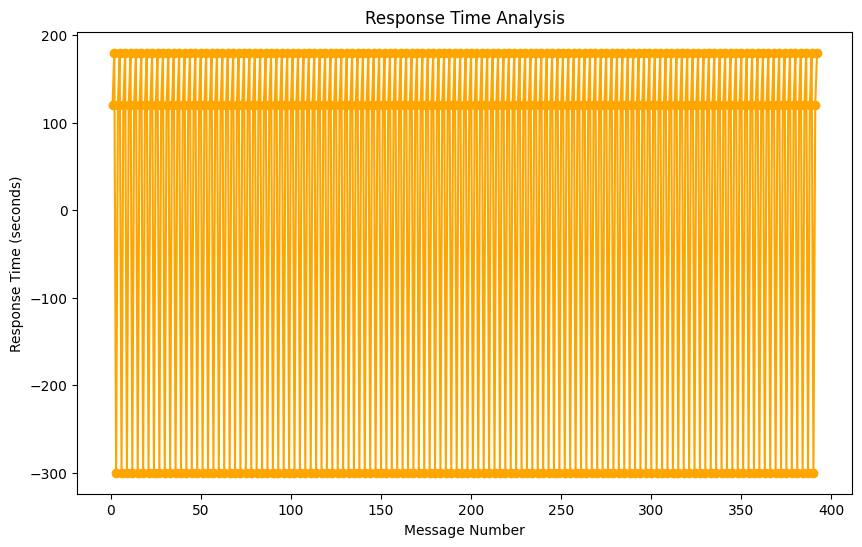

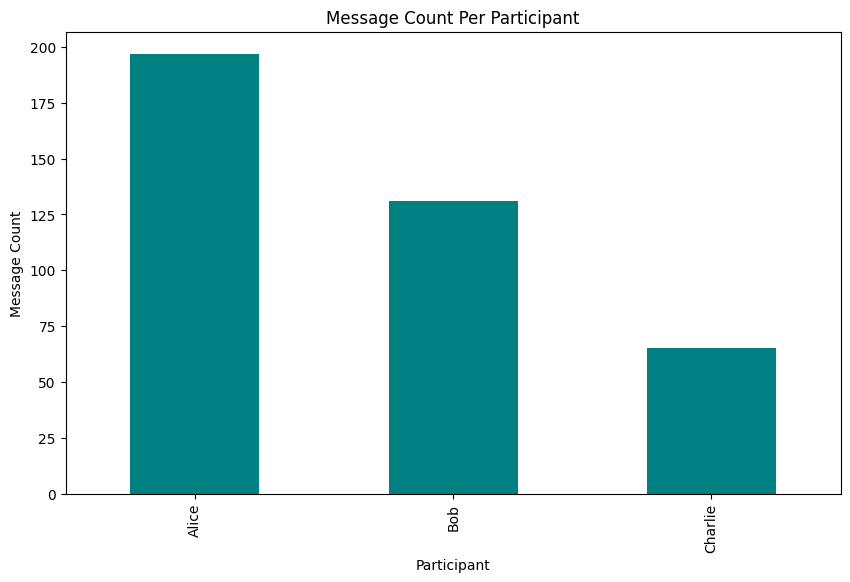

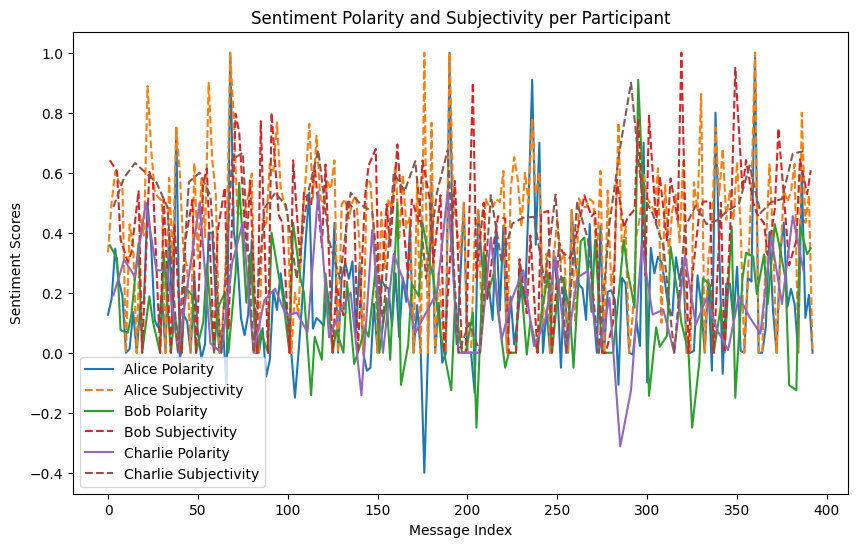

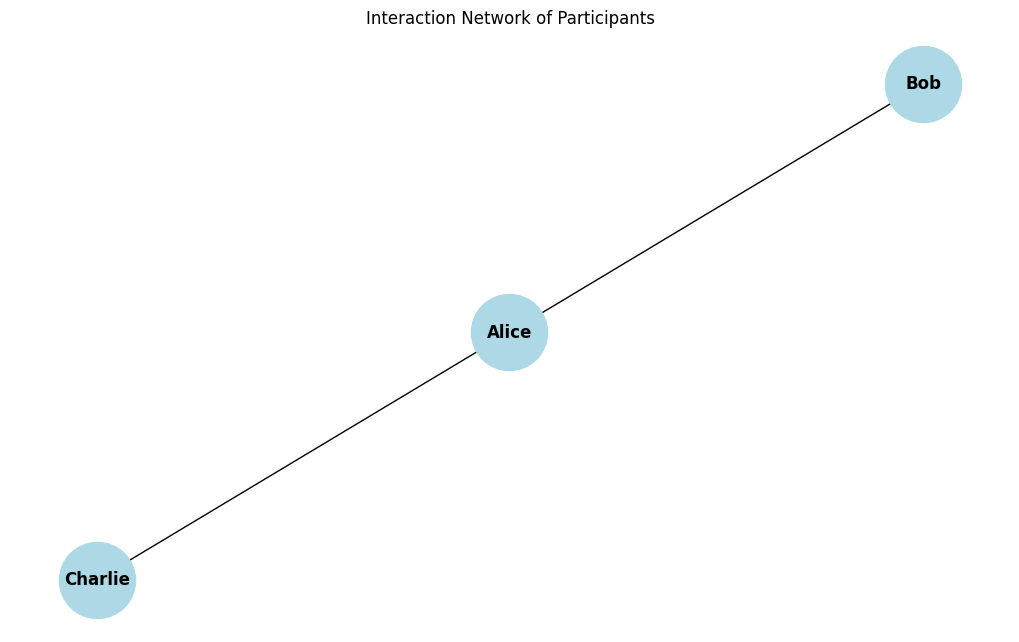

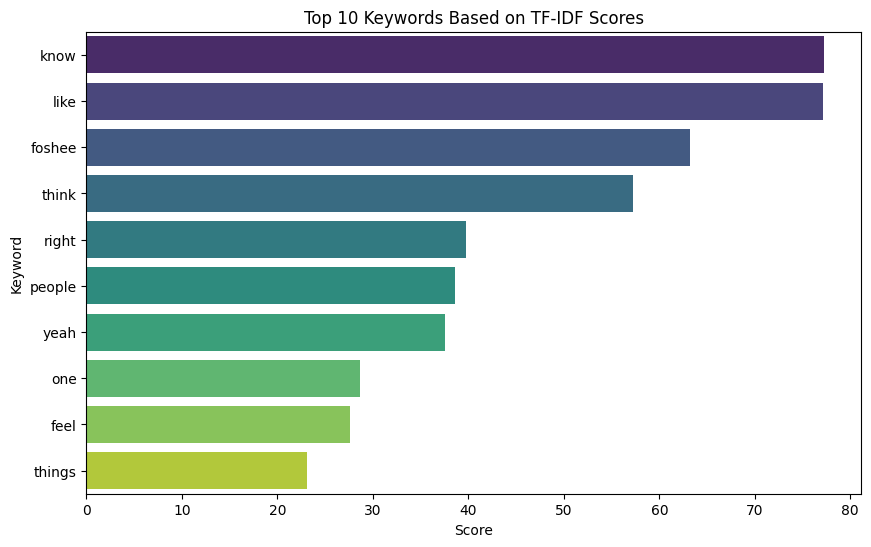

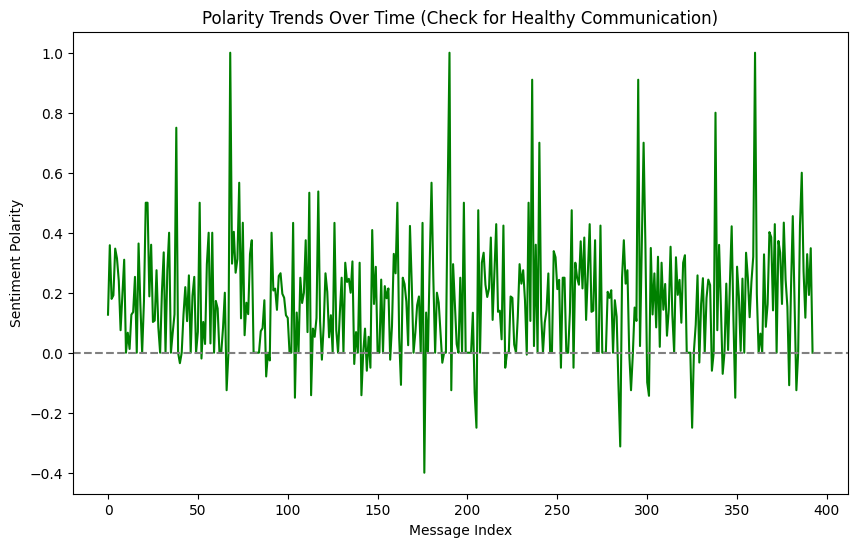

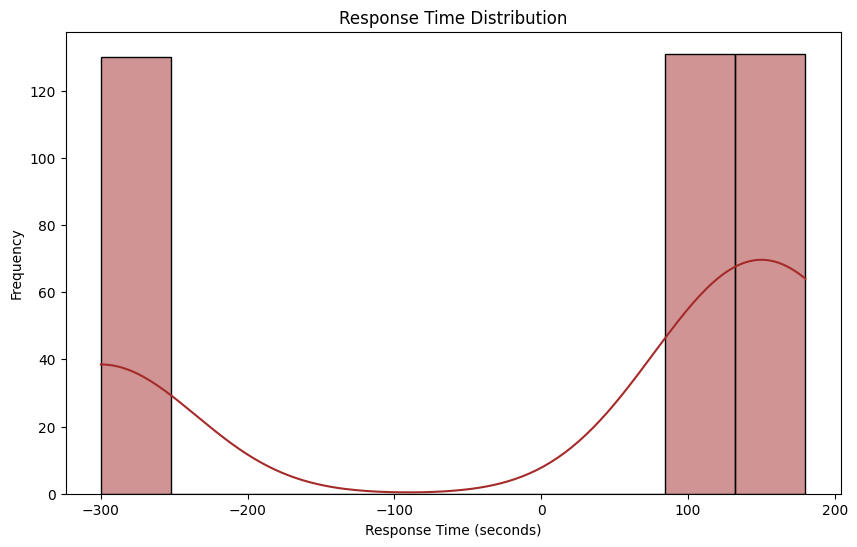

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from datetime import datetime
from wordcloud import WordCloud
import networkx as nx
import nltk
from nltk.corpus import stopwords
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

# Ensure nltk resources are downloaded
nltk.download('stopwords')

# Read the merged.txt file
with open('merged.txt', 'r') as file:
    messages = file.readlines()

# Check lengths of messages and participants (just to verify)
print("Messages length:", len(messages))

# Example: Simulating participant names (if you have participant names, use that in place of this list)
# If participants list is not provided, let's simulate some alternation between 'Alice', 'Bob', and 'Charlie'
participants = ['Alice', 'Bob', 'Alice', 'Charlie', 'Alice', 'Bob'] * (len(messages) // 6)

# If the number of participants is not exactly the same as messages, adjust the list length
participants = participants * (len(messages) // len(participants)) + participants[:len(messages) % len(participants)]

# Verify that the lengths now match
print("Participants length:", len(participants))

# Create DataFrame for messages
data = pd.DataFrame(messages, columns=['message'])
data['participant'] = participants

# Sentiment Analysis
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply sentiment analysis
data[['polarity', 'subjectivity']] = data['message'].apply(lambda x: pd.Series(analyze_sentiment(x)))

# 1. **Sentiment Polarity and Subjectivity Over Time**
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['polarity'], label='Polarity', color='b')
plt.plot(data.index, data['subjectivity'], label='Subjectivity', color='r')
plt.xlabel('Message Index')
plt.ylabel('Sentiment Scores')
plt.title('Sentiment Polarity and Subjectivity Over Time')
plt.legend()
plt.show()

# 2. **Word Cloud for Frequent Keywords**
text = " ".join(data['message'])  # Combine all messages into one string
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Terms')
plt.show()

# 3. **Message Length Analysis**
data['message_length'] = data['message'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(data['message_length'], bins=20, kde=True, color='purple')
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

# 4. **Response Time Analysis** (If you have timestamps)
# Assuming you have timestamps, or simulate with some random data
timestamps = ['2024-11-01 10:00:00', '2024-11-01 10:02:00', '2024-11-01 10:05:00'] * (len(messages) // 3)
timestamps = [datetime.strptime(ts, "%Y-%m-%d %H:%M:%S") for ts in timestamps]

# Calculate response times (difference between timestamps)
response_times = [(timestamps[i] - timestamps[i-1]).total_seconds() for i in range(1, len(timestamps))]

# Plot response times
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(response_times) + 1), response_times, marker='o', color='orange')
plt.xlabel('Message Number')
plt.ylabel('Response Time (seconds)')
plt.title('Response Time Analysis')
plt.show()

# 5. **Message Frequency per Participant (Engagement Analysis)**
message_count = data['participant'].value_counts()

plt.figure(figsize=(10, 6))
message_count.plot(kind='bar', color='teal')
plt.title('Message Count Per Participant')
plt.xlabel('Participant')
plt.ylabel('Message Count')
plt.show()

# 6. **Polarity and Subjectivity Over Time (Plotting Individual Participant Trends)**
# Split polarity and subjectivity by participants
plt.figure(figsize=(10, 6))
for participant in data['participant'].unique():
    participant_data = data[data['participant'] == participant]
    plt.plot(participant_data.index, participant_data['polarity'], label=f'{participant} Polarity')
    plt.plot(participant_data.index, participant_data['subjectivity'], label=f'{participant} Subjectivity', linestyle='--')

plt.xlabel('Message Index')
plt.ylabel('Sentiment Scores')
plt.title('Sentiment Polarity and Subjectivity per Participant')
plt.legend()
plt.show()

# 7. **Engagement Network (Interaction Network)**
# Creating a simple communication network: Nodes = participants, Edges = messages exchanged
G = nx.Graph()

# Simulate that messages are exchanged between participants (adjust as per your data)
for i in range(1, len(data)):
    sender = data['participant'].iloc[i-1]
    receiver = data['participant'].iloc[i]
    G.add_edge(sender, receiver)

# Plot interaction network
plt.figure(figsize=(10, 6))
nx.draw(G, with_labels=True, node_size=3000, node_color='lightblue', font_size=12, font_weight='bold')
plt.title('Interaction Network of Participants')
plt.show()

# 8. **Topic Frequency (Keyword Extraction with TF-IDF)**
# Apply TF-IDF vectorizer to extract important keywords
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'), max_features=20)
tfidf_matrix = vectorizer.fit_transform(data['message'])
tfidf_scores = tfidf_matrix.sum(axis=0).A1  # Sum the TF-IDF scores across all messages
terms = vectorizer.get_feature_names_out()

# Create a DataFrame for easier analysis
keywords_df = pd.DataFrame(list(zip(terms, tfidf_scores)), columns=['Keyword', 'Score'])
keywords_df = keywords_df.sort_values(by='Score', ascending=False)

# Plot top 10 keywords based on TF-IDF scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Keyword', data=keywords_df.head(10), palette='viridis')
plt.title('Top 10 Keywords Based on TF-IDF Scores')
plt.show()

# 9. **Polarity Trends over Time (For Healthy Communication)**
# Check if polarity is consistently positive or changes over time
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['polarity'], label='Polarity', color='green')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Message Index')
plt.ylabel('Sentiment Polarity')
plt.title('Polarity Trends Over Time (Check for Healthy Communication)')
plt.show()

# 10. **Response Time Distribution (for Healthy Communication)**
# Analyze how quick responses are; healthy communication often has shorter response times
plt.figure(figsize=(10, 6))
sns.histplot(response_times, kde=True, color='brown')
plt.title('Response Time Distribution')
plt.xlabel('Response Time (seconds)')
plt.ylabel('Frequency')
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Messages length: 393
Participants length: 393


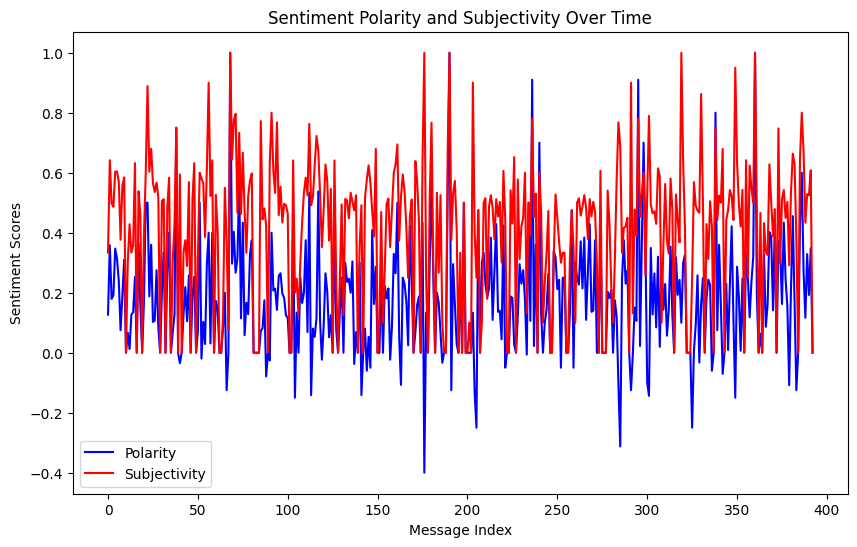

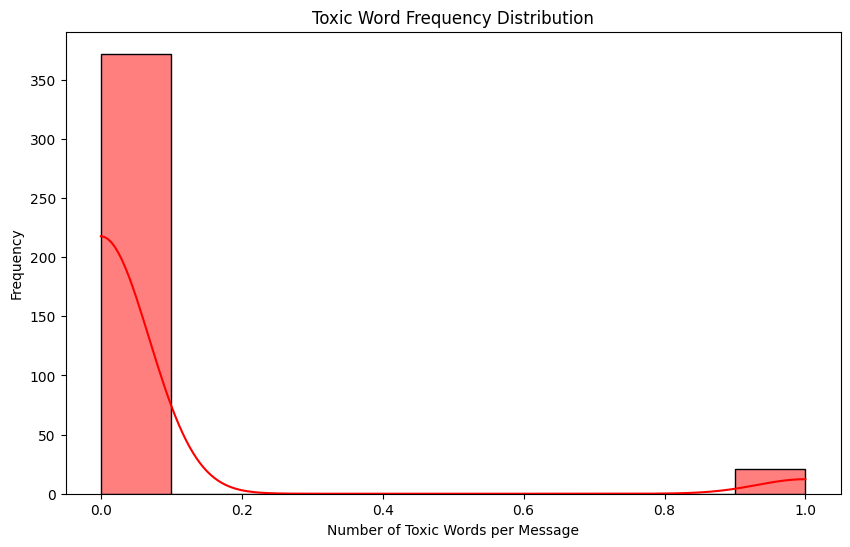

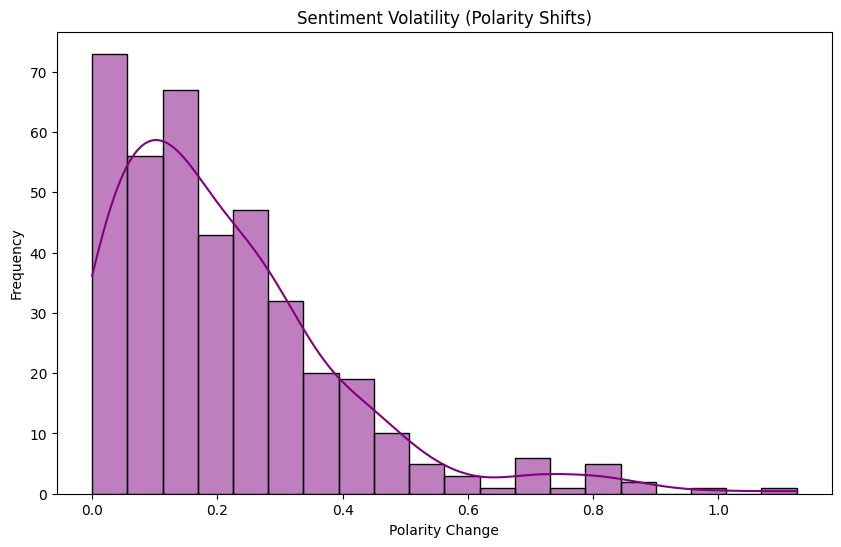

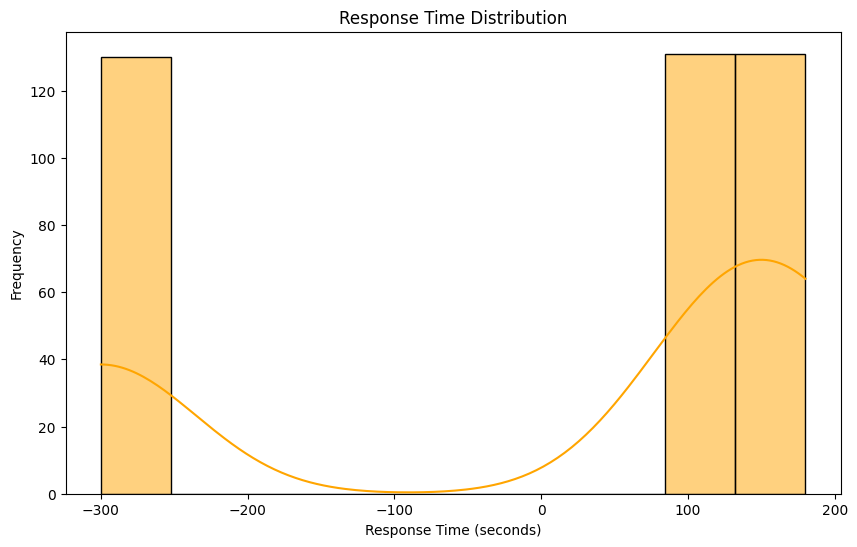

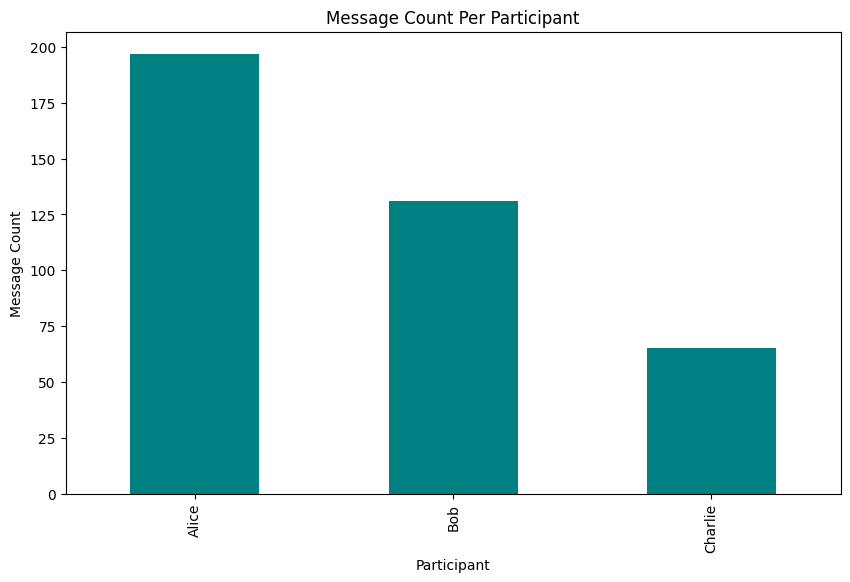

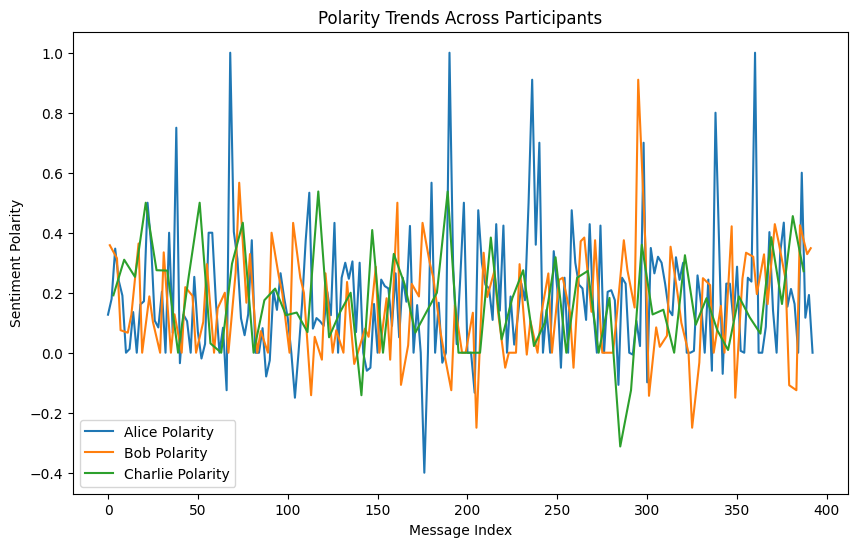

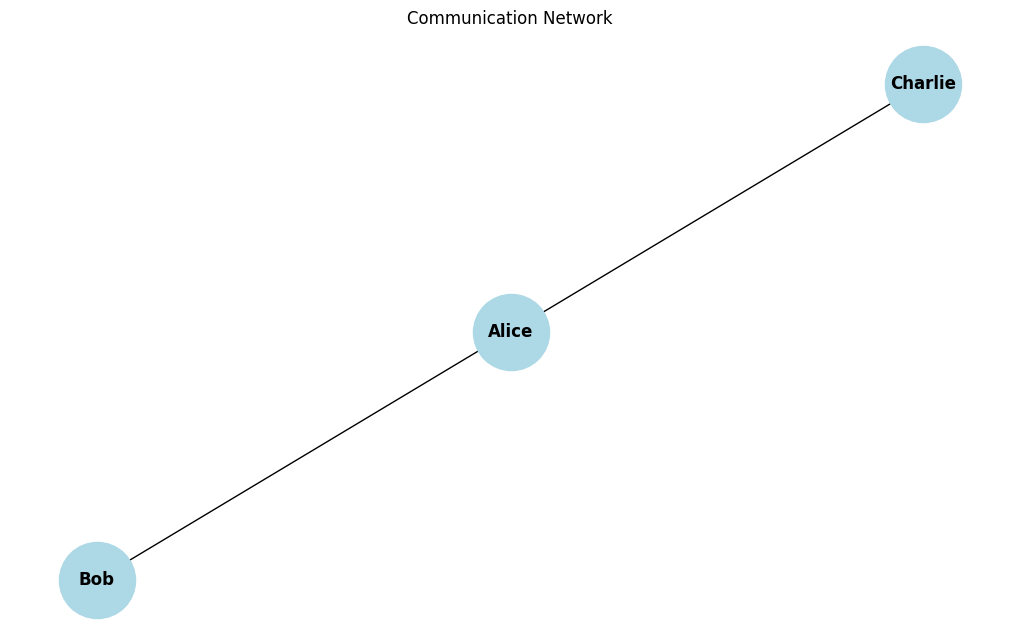

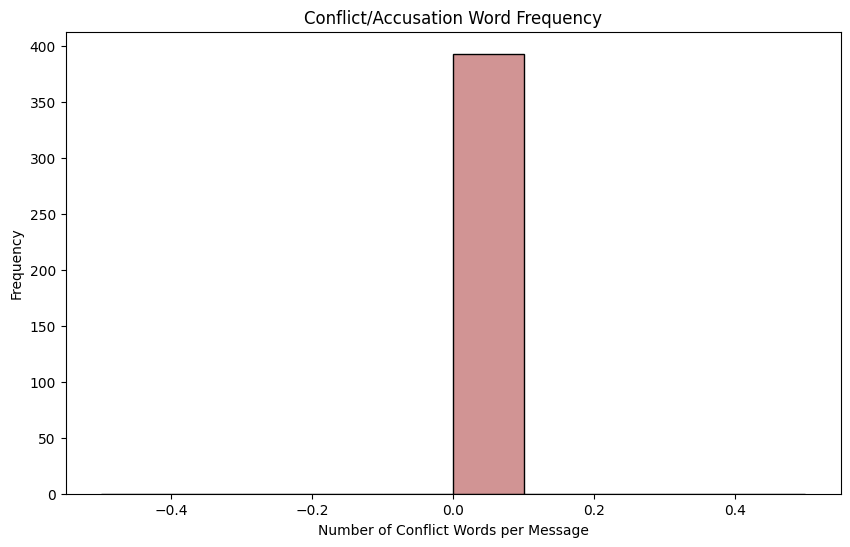

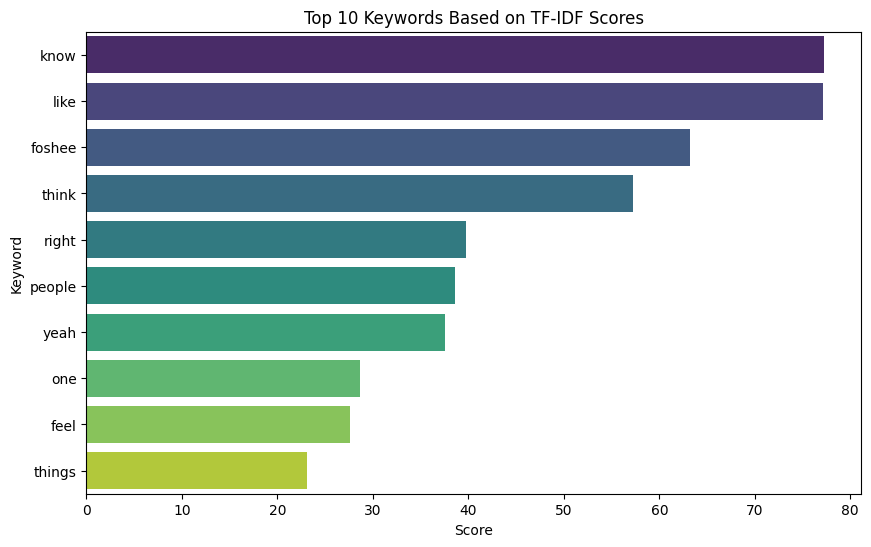

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from datetime import datetime
from wordcloud import WordCloud
import networkx as nx
import nltk
from nltk.corpus import stopwords
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Ensure nltk resources are downloaded
nltk.download('stopwords')
nltk.download('vader_lexicon')  # For Sentiment Analysis

# Read the merged.txt file
with open('merged.txt', 'r') as file:
    messages = file.readlines()

# Check lengths of messages and participants (just to verify)
print("Messages length:", len(messages))

# Example: Simulating participant names (if you have participant names, use that in place of this list)
participants = ['Alice', 'Bob', 'Alice', 'Charlie', 'Alice', 'Bob'] * (len(messages) // 6)

# If the number of participants is not exactly the same as messages, adjust the list length
participants = participants * (len(messages) // len(participants)) + participants[:len(messages) % len(participants)]

# Verify that the lengths now match
print("Participants length:", len(participants))

# Create DataFrame for messages
data = pd.DataFrame(messages, columns=['message'])
data['participant'] = participants

# Sentiment Analysis
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply sentiment analysis
data[['polarity', 'subjectivity']] = data['message'].apply(lambda x: pd.Series(analyze_sentiment(x)))

# 1. **Polarity and Subjectivity Over Time**
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['polarity'], label='Polarity', color='b')
plt.plot(data.index, data['subjectivity'], label='Subjectivity', color='r')
plt.xlabel('Message Index')
plt.ylabel('Sentiment Scores')
plt.title('Sentiment Polarity and Subjectivity Over Time')
plt.legend()
plt.show()

# 2. **Toxic Words Detection** (Using a predefined set of toxic words)
toxic_words = ['hate', 'angry', 'stupid', 'idiot', 'dumb', 'bullshit', 'loser', 'fuck', 'asshole']
toxic_word_count = data['message'].apply(lambda x: sum(1 for word in toxic_words if word in x.lower()))

plt.figure(figsize=(10, 6))
sns.histplot(toxic_word_count, bins=10, kde=True, color='red')
plt.title('Toxic Word Frequency Distribution')
plt.xlabel('Number of Toxic Words per Message')
plt.ylabel('Frequency')
plt.show()

# 3. **Sentiment Volatility (Large shifts in polarity)**:
# High volatility in polarity indicates shifts between negative and positive sentiment
data['polarity_diff'] = data['polarity'].diff().abs()  # Absolute difference between successive polarity values

# Plot the volatility (higher volatility may indicate inconsistent communication)
plt.figure(figsize=(10, 6))
sns.histplot(data['polarity_diff'], bins=20, kde=True, color='purple')
plt.title('Sentiment Volatility (Polarity Shifts)')
plt.xlabel('Polarity Change')
plt.ylabel('Frequency')
plt.show()

# 4. **Response Time Analysis**: Longer response times may indicate avoidance or disengagement
# Simulating timestamps for analysis (replace with your actual timestamps if available)
timestamps = ['2024-11-01 10:00:00', '2024-11-01 10:02:00', '2024-11-01 10:05:00'] * (len(messages) // 3)
timestamps = [datetime.strptime(ts, "%Y-%m-%d %H:%M:%S") for ts in timestamps]

# Calculate response times (difference between timestamps)
response_times = [(timestamps[i] - timestamps[i-1]).total_seconds() for i in range(1, len(timestamps))]

# Plot response times (higher response times may indicate lack of engagement)
plt.figure(figsize=(10, 6))
sns.histplot(response_times, kde=True, color='orange')
plt.title('Response Time Distribution')
plt.xlabel('Response Time (seconds)')
plt.ylabel('Frequency')
plt.show()

# 5. **Message Frequency per Participant (Imbalance in communication)**:
message_count = data['participant'].value_counts()

# Plot message frequency (imbalanced communication might indicate unhealthy patterns)
plt.figure(figsize=(10, 6))
message_count.plot(kind='bar', color='teal')
plt.title('Message Count Per Participant')
plt.xlabel('Participant')
plt.ylabel('Message Count')
plt.show()

# 6. **Polarity Shifts Across Participants**: Analyze polarity across different participants
# Unhealthy communication might have more frequent negative polarity
plt.figure(figsize=(10, 6))
for participant in data['participant'].unique():
    participant_data = data[data['participant'] == participant]
    plt.plot(participant_data.index, participant_data['polarity'], label=f'{participant} Polarity')

plt.xlabel('Message Index')
plt.ylabel('Sentiment Polarity')
plt.title('Polarity Trends Across Participants')
plt.legend()
plt.show()

# 7. **Engagement Network (Interaction Analysis)**:
# Lack of mutual interaction may indicate unhealthy communication dynamics
G = nx.Graph()

# Create a simple communication network where nodes are participants and edges represent interactions
for i in range(1, len(data)):
    sender = data['participant'].iloc[i-1]
    receiver = data['participant'].iloc[i]
    G.add_edge(sender, receiver)

# Plot the communication network
plt.figure(figsize=(10, 6))
nx.draw(G, with_labels=True, node_size=3000, node_color='lightblue', font_size=12, font_weight='bold')
plt.title('Communication Network')
plt.show()

# 8. **Frequent Conflicts (Detect Accusations, Conflicts, or Sarcasm)**:
# Let's assume certain phrases (e.g., 'accuse', 'blame', 'you always', 'never') indicate conflict
conflict_phrases = ['accuse', 'blame', 'you always', 'you never', 'sarcastic']
conflict_count = data['message'].apply(lambda x: sum(1 for phrase in conflict_phrases if phrase in x.lower()))

plt.figure(figsize=(10, 6))
sns.histplot(conflict_count, bins=10, kde=True, color='brown')
plt.title('Conflict/Accusation Word Frequency')
plt.xlabel('Number of Conflict Words per Message')
plt.ylabel('Frequency')
plt.show()

# 9. **TF-IDF to Detect Dominant Topics and Words**:
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'), max_features=20)
tfidf_matrix = vectorizer.fit_transform(data['message'])
tfidf_scores = tfidf_matrix.sum(axis=0).A1  # Sum the TF-IDF scores across all messages
terms = vectorizer.get_feature_names_out()

# Create a DataFrame for easier analysis
keywords_df = pd.DataFrame(list(zip(terms, tfidf_scores)), columns=['Keyword', 'Score'])
keywords_df = keywords_df.sort_values(by='Score', ascending=False)

# Plot top 10 keywords based on TF-IDF scores (to see any dominant negative or toxic words)
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Keyword', data=keywords_df.head(10), palette='viridis')
plt.title('Top 10 Keywords Based on TF-IDF Scores')
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Messages length: 393
Messages length: 351
Participants length: 351


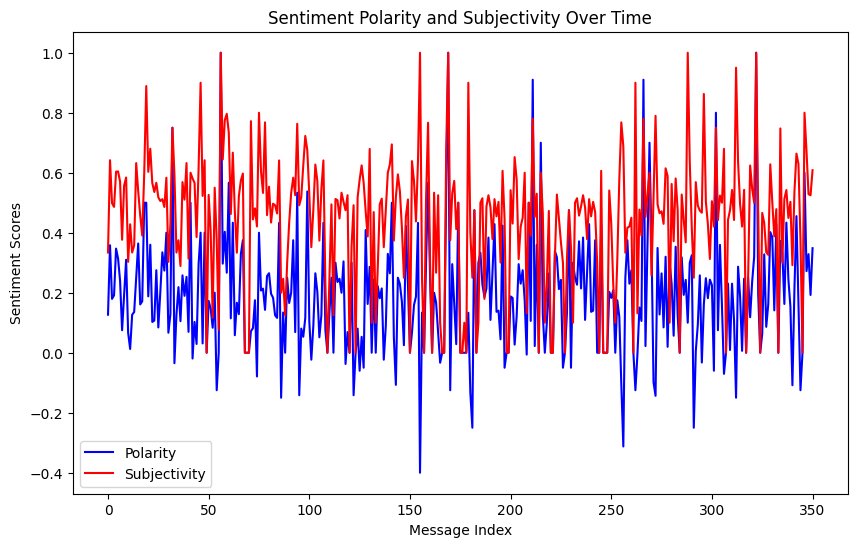

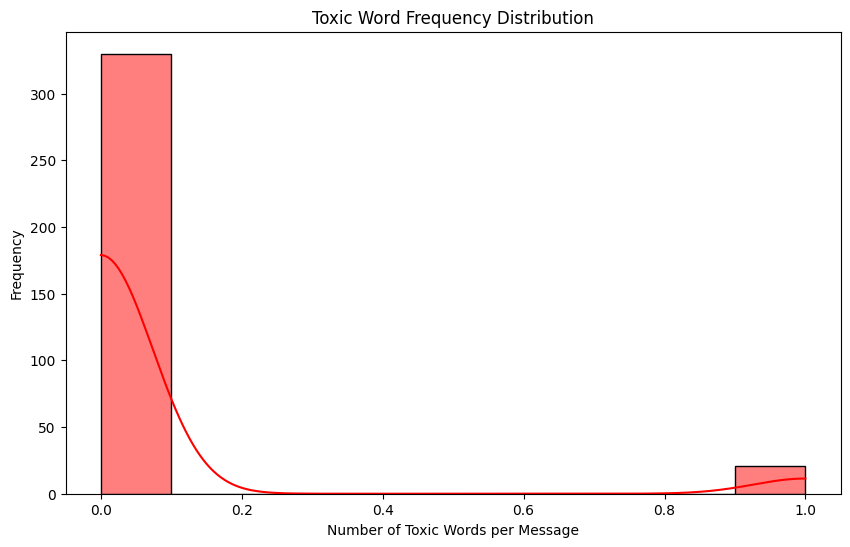

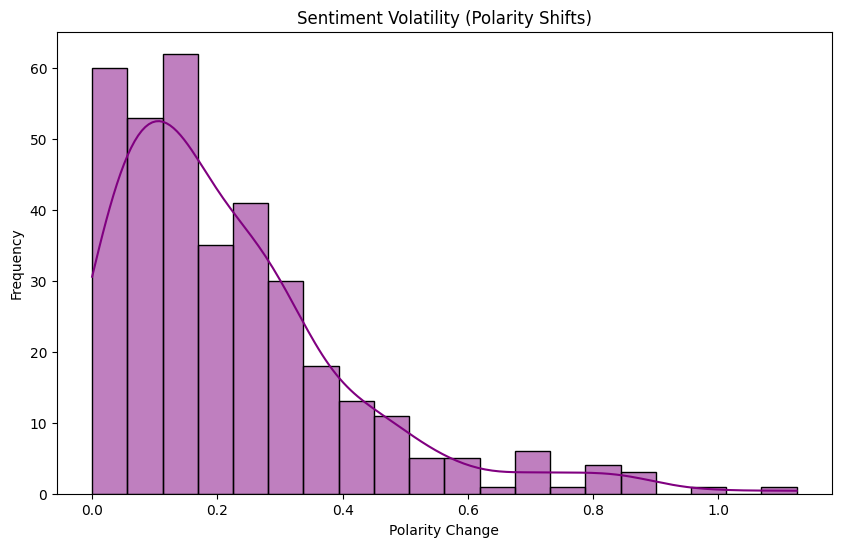

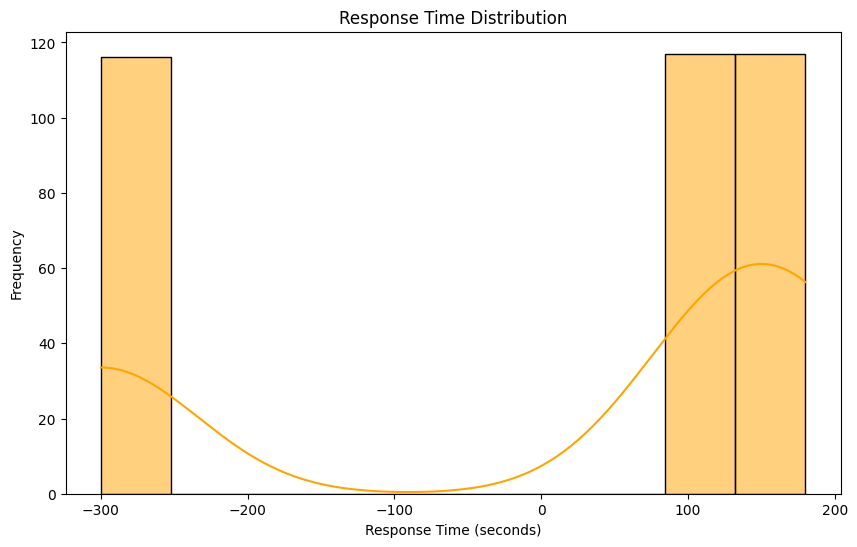

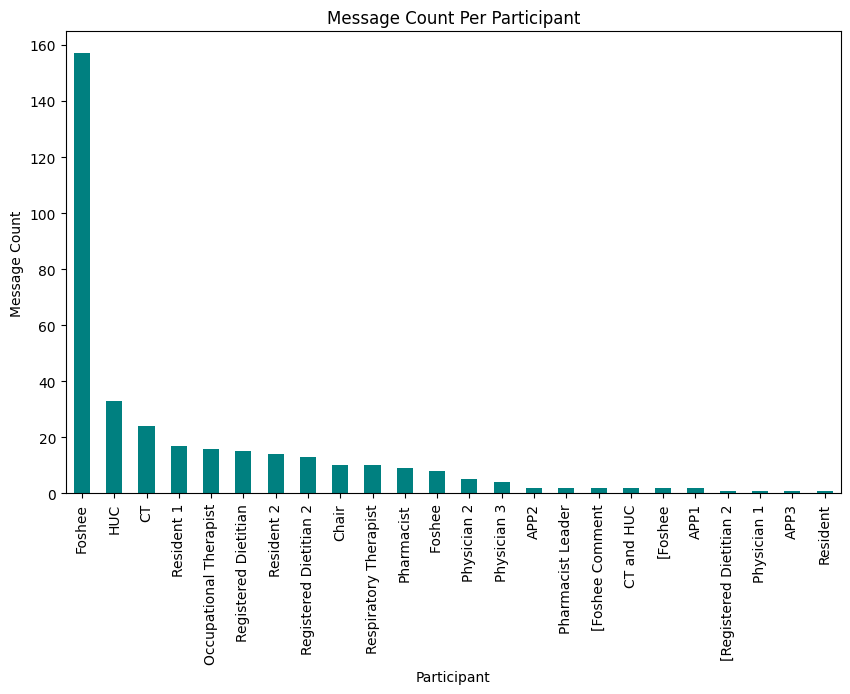

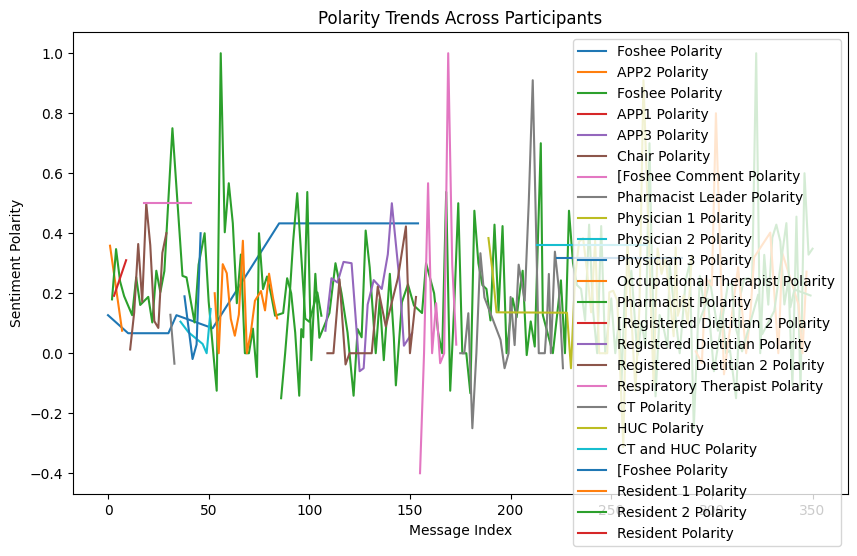

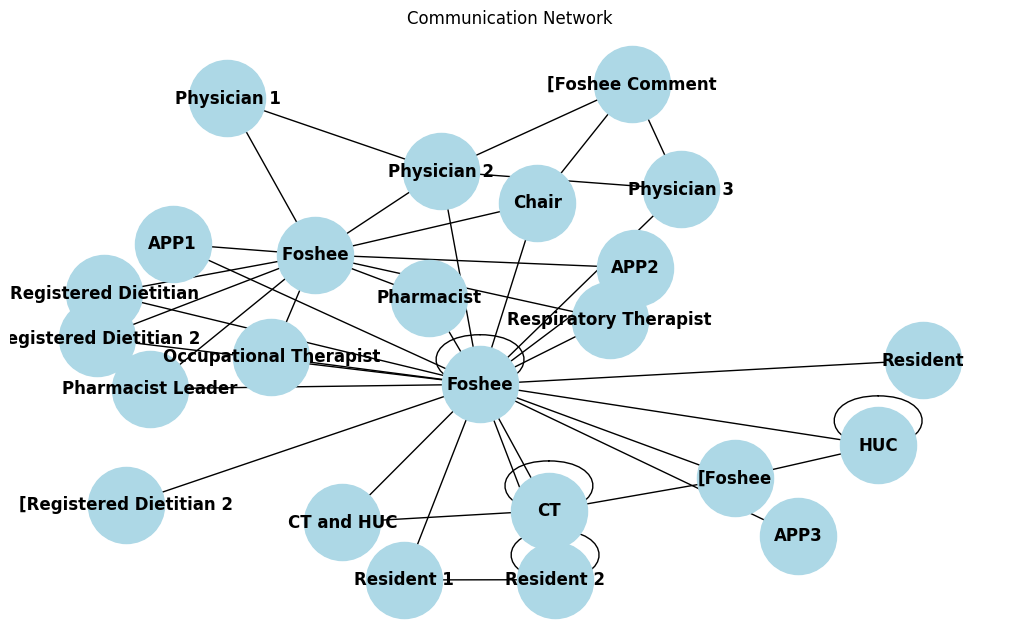

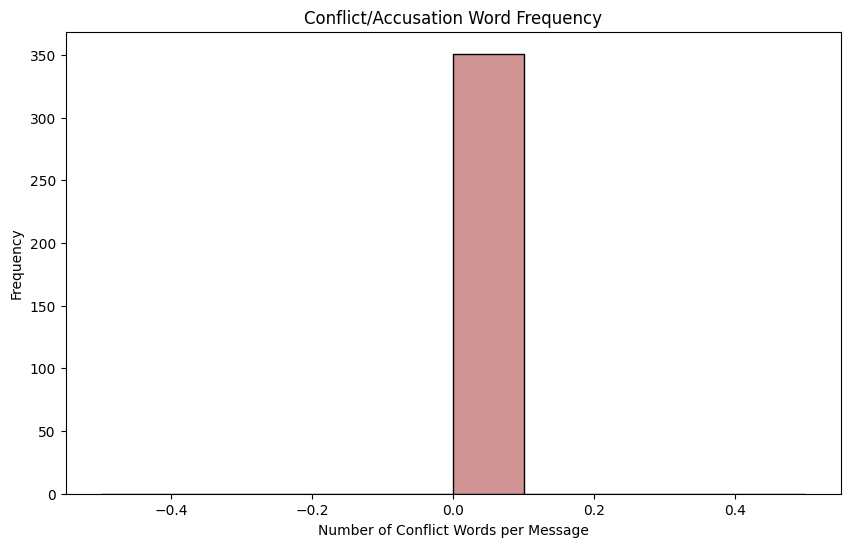

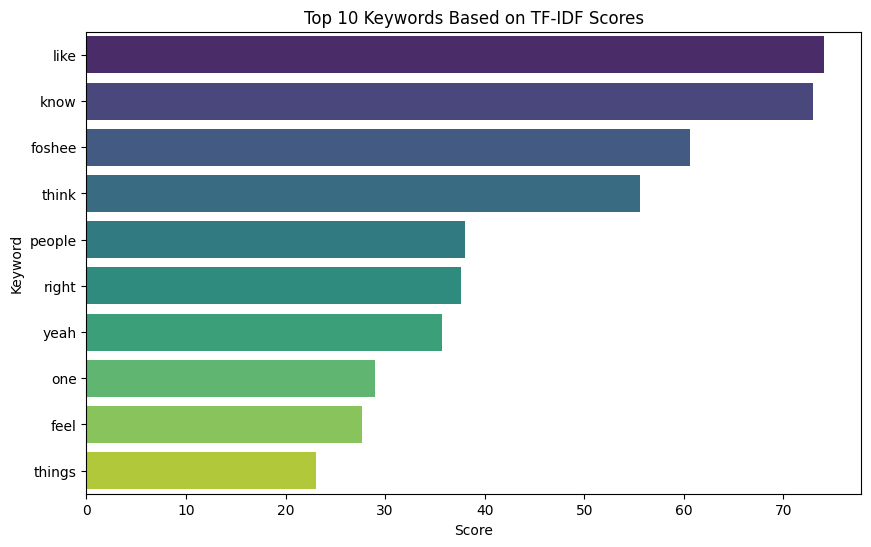

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from datetime import datetime
from wordcloud import WordCloud
import networkx as nx
import nltk
from nltk.corpus import stopwords
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Ensure nltk resources are downloaded
nltk.download('stopwords')
nltk.download('vader_lexicon')  # For Sentiment Analysis

# Read the merged.txt file
with open('merged.txt', 'r') as file:
    messages = file.readlines()

# Check lengths of messages
print("Messages length:", len(messages))

# Inferring participants: Assuming each line starts with participant's name
# You might need to modify the pattern based on actual format (like ": " or a different separator after participant name)
participants = [message.split(':')[0].strip() for message in messages if ':' in message]

# If there are lines without participants or invalid formats, clean them up
messages = [message for message in messages if ':' in message]

# Verify lengths of messages and participants
print("Messages length:", len(messages))
print("Participants length:", len(participants))

# Create DataFrame for messages
data = pd.DataFrame(messages, columns=['message'])
data['participant'] = participants

# Sentiment Analysis
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply sentiment analysis
data[['polarity', 'subjectivity']] = data['message'].apply(lambda x: pd.Series(analyze_sentiment(x)))

# 1. **Polarity and Subjectivity Over Time**
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['polarity'], label='Polarity', color='b')
plt.plot(data.index, data['subjectivity'], label='Subjectivity', color='r')
plt.xlabel('Message Index')
plt.ylabel('Sentiment Scores')
plt.title('Sentiment Polarity and Subjectivity Over Time')
plt.legend()
plt.show()

# 2. **Toxic Words Detection** (Using a predefined set of toxic words)
toxic_words = ['hate', 'angry', 'stupid', 'idiot', 'dumb', 'bullshit', 'loser', 'fuck', 'asshole']
toxic_word_count = data['message'].apply(lambda x: sum(1 for word in toxic_words if word in x.lower()))

plt.figure(figsize=(10, 6))
sns.histplot(toxic_word_count, bins=10, kde=True, color='red')
plt.title('Toxic Word Frequency Distribution')
plt.xlabel('Number of Toxic Words per Message')
plt.ylabel('Frequency')
plt.show()

# 3. **Sentiment Volatility (Large shifts in polarity)**:
# High volatility in polarity indicates shifts between negative and positive sentiment
data['polarity_diff'] = data['polarity'].diff().abs()  # Absolute difference between successive polarity values

# Plot the volatility (higher volatility may indicate inconsistent communication)
plt.figure(figsize=(10, 6))
sns.histplot(data['polarity_diff'], bins=20, kde=True, color='purple')
plt.title('Sentiment Volatility (Polarity Shifts)')
plt.xlabel('Polarity Change')
plt.ylabel('Frequency')
plt.show()

# 4. **Response Time Analysis**: Longer response times may indicate avoidance or disengagement
# Simulating timestamps for analysis (replace with your actual timestamps if available)
timestamps = ['2024-11-01 10:00:00', '2024-11-01 10:02:00', '2024-11-01 10:05:00'] * (len(messages) // 3)
timestamps = [datetime.strptime(ts, "%Y-%m-%d %H:%M:%S") for ts in timestamps]

# Calculate response times (difference between timestamps)
response_times = [(timestamps[i] - timestamps[i-1]).total_seconds() for i in range(1, len(timestamps))]

# Plot response times (higher response times may indicate lack of engagement)
plt.figure(figsize=(10, 6))
sns.histplot(response_times, kde=True, color='orange')
plt.title('Response Time Distribution')
plt.xlabel('Response Time (seconds)')
plt.ylabel('Frequency')
plt.show()

# 5. **Message Frequency per Participant (Imbalance in communication)**:
message_count = data['participant'].value_counts()

# Plot message frequency (imbalanced communication might indicate unhealthy patterns)
plt.figure(figsize=(10, 6))
message_count.plot(kind='bar', color='teal')
plt.title('Message Count Per Participant')
plt.xlabel('Participant')
plt.ylabel('Message Count')
plt.show()

# 6. **Polarity Shifts Across Participants**: Analyze polarity across different participants
# Unhealthy communication might have more frequent negative polarity
plt.figure(figsize=(10, 6))
for participant in data['participant'].unique():
    participant_data = data[data['participant'] == participant]
    plt.plot(participant_data.index, participant_data['polarity'], label=f'{participant} Polarity')

plt.xlabel('Message Index')
plt.ylabel('Sentiment Polarity')
plt.title('Polarity Trends Across Participants')
plt.legend()
plt.show()

# 7. **Engagement Network (Interaction Analysis)**:
# Lack of mutual interaction may indicate unhealthy communication dynamics
G = nx.Graph()

# Create a simple communication network where nodes are participants and edges represent interactions
for i in range(1, len(data)):
    sender = data['participant'].iloc[i-1]
    receiver = data['participant'].iloc[i]
    G.add_edge(sender, receiver)

# Plot the communication network
plt.figure(figsize=(10, 6))
nx.draw(G, with_labels=True, node_size=3000, node_color='lightblue', font_size=12, font_weight='bold')
plt.title('Communication Network')
plt.show()

# 8. **Frequent Conflicts (Detect Accusations, Conflicts, or Sarcasm)**:
# Let's assume certain phrases (e.g., 'accuse', 'blame', 'you always', 'never') indicate conflict
conflict_phrases = ['accuse', 'blame', 'you always', 'you never', 'sarcastic']
conflict_count = data['message'].apply(lambda x: sum(1 for phrase in conflict_phrases if phrase in x.lower()))

plt.figure(figsize=(10, 6))
sns.histplot(conflict_count, bins=10, kde=True, color='brown')
plt.title('Conflict/Accusation Word Frequency')
plt.xlabel('Number of Conflict Words per Message')
plt.ylabel('Frequency')
plt.show()

# 9. **TF-IDF to Detect Dominant Topics and Words**:
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'), max_features=20)
tfidf_matrix = vectorizer.fit_transform(data['message'])
tfidf_scores = tfidf_matrix.sum(axis=0).A1  # Sum the TF-IDF scores across all messages
terms = vectorizer.get_feature_names_out()

# Create a DataFrame for easier analysis
keywords_df = pd.DataFrame(list(zip(terms, tfidf_scores)), columns=['Keyword', 'Score'])
keywords_df = keywords_df.sort_values(by='Score', ascending=False)

# Plot top 10 keywords based on TF-IDF scores (to see any dominant negative or toxic words)
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Keyword', data=keywords_df.head(10), palette='viridis')
plt.title('Top 10 Keywords Based on TF-IDF Scores')
plt.show()


In [32]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [33]:
!pip install pyLDAvis.sklearn

ERROR: Could not find a version that satisfies the requirement pyLDAvis.sklearn (from versions: none)
ERROR: No matching distribution found for pyLDAvis.sklearn


In [35]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 18.3 MB/s eta 0:00:00


In [36]:
import pyLDAvis
import pyLDAvis.gensim_models


In [37]:
!pip install pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [38]:
import nltk
nltk.download('wordnet')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



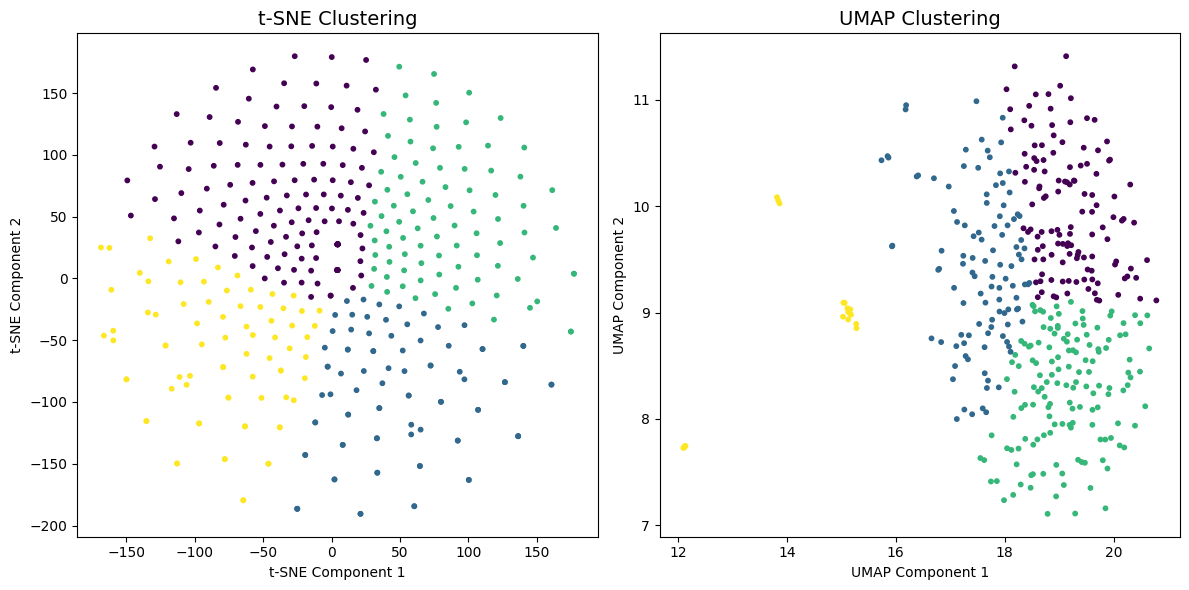

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Load and preprocess the data
def preprocess_text(text):
    import re
    from nltk.corpus import stopwords
    from nltk.stem import WordNetLemmatizer

    # Remove special characters, numbers, and extra spaces
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()

    # Tokenization and lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word.lower()) for word in text.split()]

    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]

    return " ".join(tokens)

# Read the input file
file_path = "merged.txt"
with open(file_path, "r", encoding="utf-8") as file:
    raw_data = file.readlines()

# Preprocess the text data
preprocessed_data = [preprocess_text(line) for line in raw_data]

# Step 2: Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = vectorizer.fit_transform(preprocessed_data).toarray()

# Standardize the data
scaler = StandardScaler()
tfidf_matrix_scaled = scaler.fit_transform(tfidf_matrix)

# Step 3: Apply dimensionality reduction (t-SNE)
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_result = tsne.fit_transform(tfidf_matrix_scaled)

# Apply dimensionality reduction (UMAP)
umap = UMAP(n_components=2, random_state=42)
umap_result = umap.fit_transform(tfidf_matrix_scaled)

# Step 4: Cluster the data using K-Means
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust the number of clusters as needed
clusters_tsne = kmeans.fit_predict(tsne_result)
clusters_umap = kmeans.fit_predict(umap_result)

# Step 5: Visualize the results
plt.figure(figsize=(12, 6))

# t-SNE visualization
plt.subplot(1, 2, 1)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=clusters_tsne, cmap="viridis", s=10)
plt.title("t-SNE Clustering", fontsize=14)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")

# UMAP visualization
plt.subplot(1, 2, 2)
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=clusters_umap, cmap="viridis", s=10)
plt.title("UMAP Clustering", fontsize=14)
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


LDA Topics:
Topic 1:
end, program, came, kind, experience, communication, go, feel covered, covered, covered smile
Topic 2:
communication, huc, try, notice, within, take, round, versus, chair, monday friday
Topic 3:
like, know, therapist, feel, occupational, occupational therapist, remember, feel like, environment, time
Topic 4:
like, know, think, resident, people, team, time, make, even, come
Topic 5:
use, right, people, get, energy, since, people energy, energy right, else, therapist
Topic 6:
back, idea, interprofessional, smile, good idea, collaboration, program, like good, smile program, interprofessional collaboration
Topic 7:
ct, right, know, one, resident, remember, communicate, march, think, rt
Topic 8:
worked, stand, worked well, share, people, profession, well, prompt, sharing, people feel
Topic 9:
using, huc, know, like, micu, go, day, problem, may, theyre
Topic 10:
huc, role responsibility, feel comfortable, responsibility, attended, comfortable, role, happen, huc think, hu

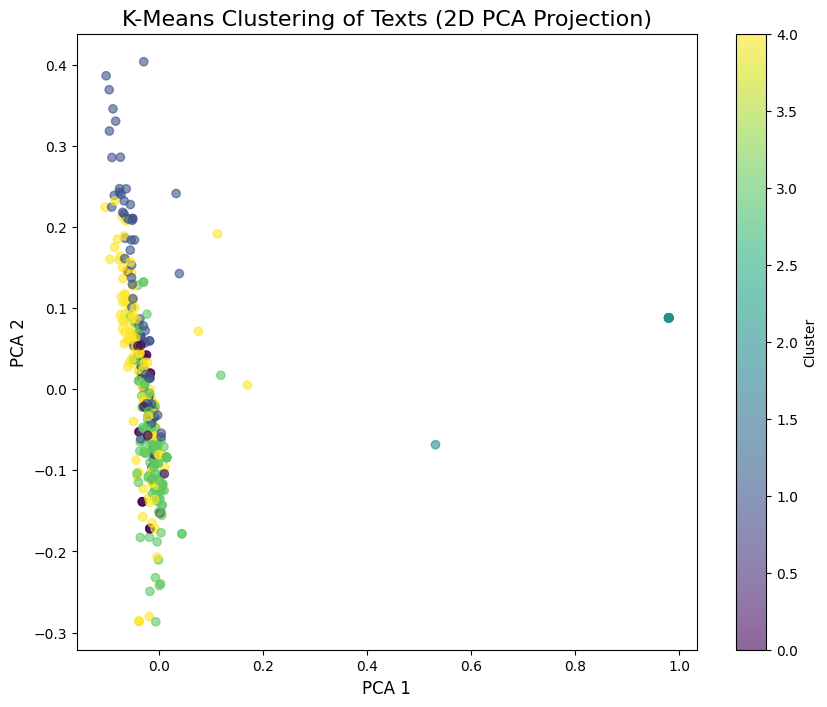

In [49]:
import re
import nltk
import pyLDAvis
from pyLDAvis import prepare
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Ensure necessary NLTK downloads
nltk.download('stopwords')
nltk.download('wordnet')

# Custom stopword list
domain_stopwords = set(stopwords.words('english') + [
    "yeah", "thing", "would", "dont", "foshee", "thats", "youre", "going", "wa", "could"
])

# Preprocessing function
def preprocess_text(text):
    """Preprocess the text by removing special characters, numbers, and lemmatizing words."""
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove special characters and numbers
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word.lower()) for word in text.split()]
    return " ".join([word for word in tokens if word not in domain_stopwords])

# Load and preprocess data
file_path = "merged.txt"  # Replace with your file path
with open(file_path, "r", encoding="utf-8") as file:
    raw_data = file.readlines()

# Apply preprocessing to the data
preprocessed_data = [preprocess_text(line) for line in raw_data]

# Vectorize text using TF-IDF with bigrams
tfidf_vectorizer = TfidfVectorizer(max_features=3000, ngram_range=(1, 2))
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_data)

# LDA for topic modeling
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(tfidf_matrix)

# Function to print top words for each topic
def print_topics(model, vectorizer, top_n=10):
    terms = vectorizer.get_feature_names_out()
    for idx, topic in enumerate(model.components_):
        print(f"Topic {idx + 1}:")
        print(", ".join([terms[i] for i in topic.argsort()[:-top_n - 1:-1]]))

print("LDA Topics:")
print_topics(lda, tfidf_vectorizer)

# Visualize topics with pyLDAvis
panel = prepare(
    topic_term_dists=lda.components_,
    doc_topic_dists=lda.transform(tfidf_matrix),
    doc_lengths=[len(text.split()) for text in preprocessed_data],
    vocab=tfidf_vectorizer.get_feature_names_out(),
    term_frequency=tfidf_matrix.toarray().sum(axis=0)
)

# Display the LDA topic visualization
pyLDAvis.enable_notebook()  # Use this in Jupyter notebooks
pyLDAvis.display(panel)

# NMF for alternative topic modeling
nmf = NMF(n_components=10, random_state=42)
nmf.fit(tfidf_matrix)

print("\nNMF Topics:")
print_topics(nmf, tfidf_vectorizer)

# K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(tfidf_matrix)

# Analyze K-Means clusters
clustered_data = {i: [] for i in range(5)}
for text, label in zip(preprocessed_data, kmeans_labels):
    clustered_data[label].append(text)

# Print clusters with sample texts
for cluster, texts in clustered_data.items():
    print(f"\nCluster {cluster + 1}:")
    print("\n".join(texts[:5]))  # Show first 5 texts in the cluster

# Visualizing K-Means clusters in 2D using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(tfidf_matrix.toarray())

# Plot the data points, colored by their KMeans cluster labels
plt.figure(figsize=(10, 8))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6)

# Add labels and title
plt.title('K-Means Clustering of Texts (2D PCA Projection)', fontsize=16)
plt.xlabel('PCA 1', fontsize=12)
plt.ylabel('PCA 2', fontsize=12)
plt.colorbar(label='Cluster')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Number of messages: 393


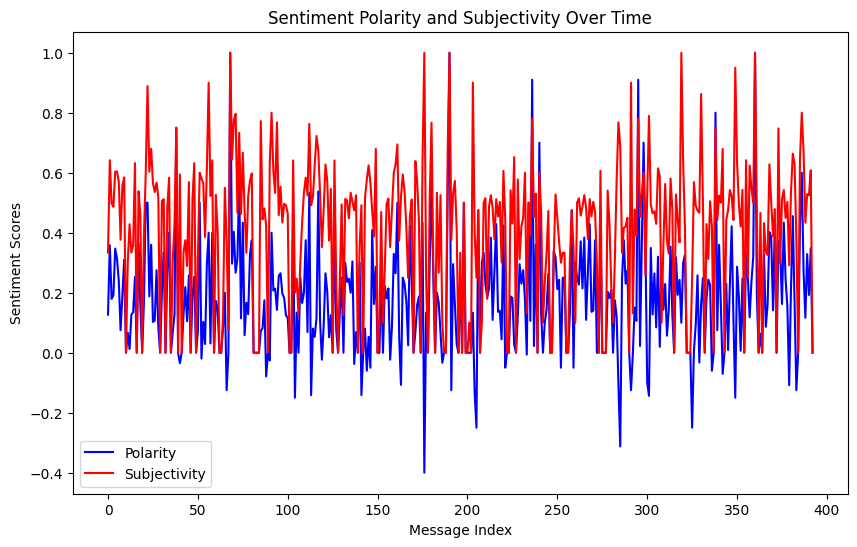

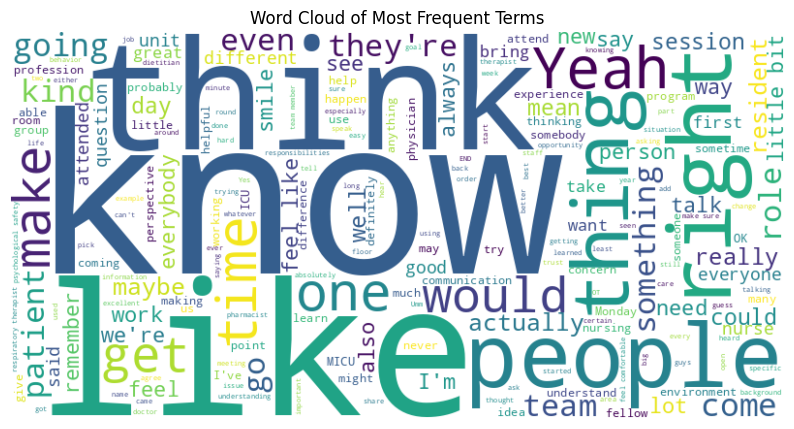

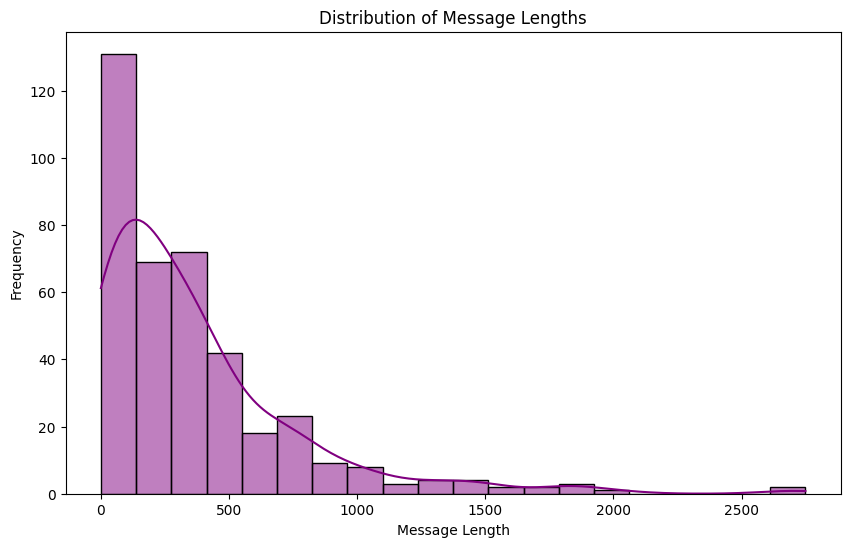

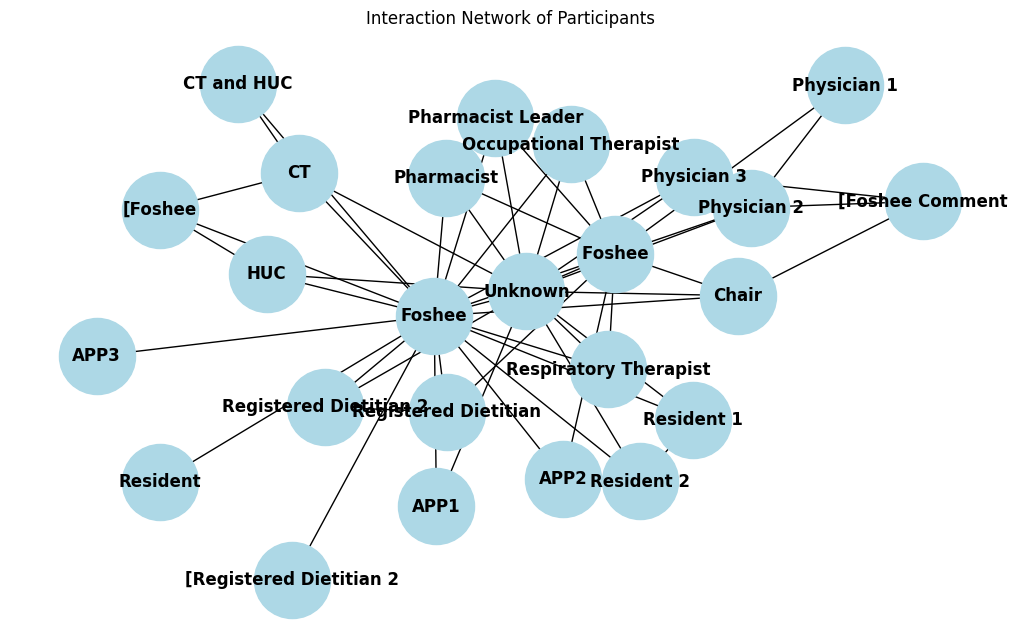

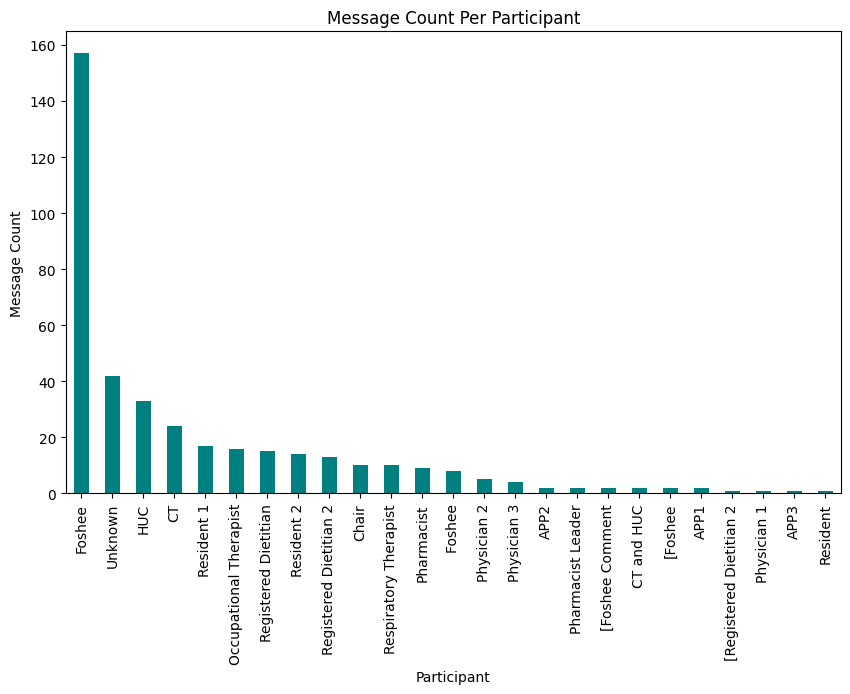

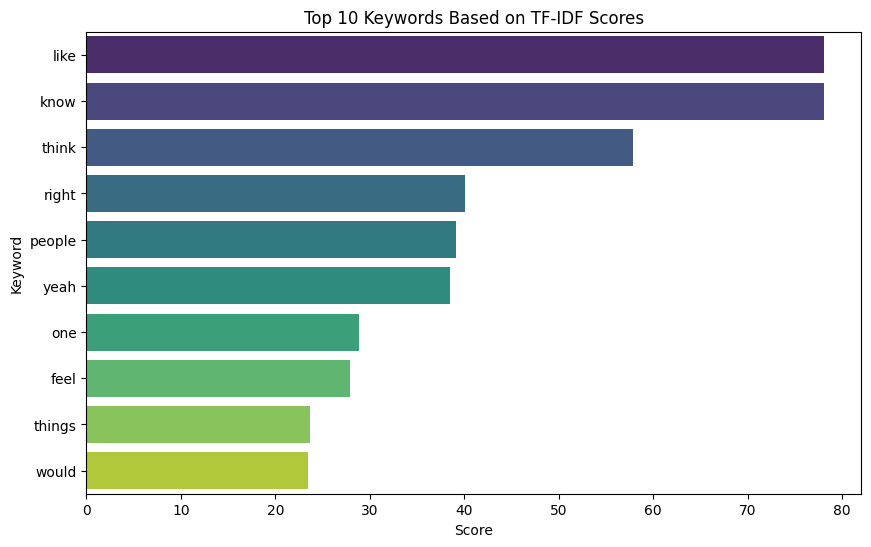

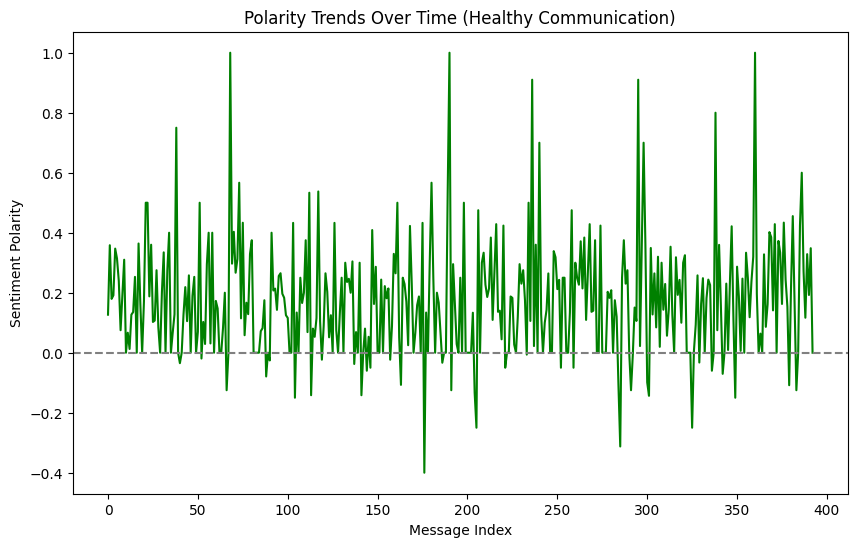

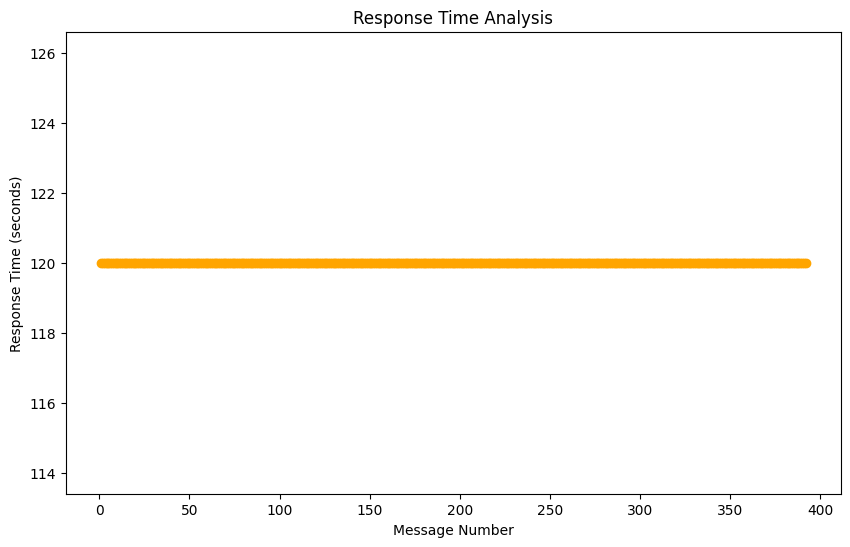

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from datetime import datetime
from wordcloud import WordCloud
import networkx as nx
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Ensure NLTK resources are downloaded
nltk.download('stopwords')

# 1. Load and Preprocess Data
# Assuming "merged.txt" contains messages with participant names included
with open('merged.txt', 'r') as file:
    lines = file.readlines()

# Splitting participant names and messages if the format is "Participant: Message"
data = []
for line in lines:
    if ":" in line:
        participant, message = line.split(":", 1)
        data.append((participant.strip(), message.strip()))
    else:
        data.append(("Unknown", line.strip()))

# Convert to DataFrame
data = pd.DataFrame(data, columns=['participant', 'message'])

# Check the length of messages
print("Number of messages:", len(data))

# Sentiment Analysis
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

data[['polarity', 'subjectivity']] = data['message'].apply(lambda x: pd.Series(analyze_sentiment(x)))

# 2. Plot Sentiment Polarity and Subjectivity Over Time
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['polarity'], label='Polarity', color='blue')
plt.plot(data.index, data['subjectivity'], label='Subjectivity', color='red')
plt.xlabel('Message Index')
plt.ylabel('Sentiment Scores')
plt.title('Sentiment Polarity and Subjectivity Over Time')
plt.legend()
plt.show()

# 3. Word Cloud for Frequent Keywords
text = " ".join(data['message'])
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=set(stopwords.words('english'))).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Terms')
plt.show()

# 4. Message Length Analysis
data['message_length'] = data['message'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(data['message_length'], bins=20, kde=True, color='purple')
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

# 5. Interaction Network of Participants
G = nx.Graph()

# Create edges based on sender and receiver
for i in range(1, len(data)):
    sender = data['participant'].iloc[i - 1]
    receiver = data['participant'].iloc[i]
    if sender != receiver:  # Avoid self-loops
        G.add_edge(sender, receiver)

# Plot the interaction network
plt.figure(figsize=(10, 6))
nx.draw(G, with_labels=True, node_size=3000, node_color='lightblue', font_size=12, font_weight='bold')
plt.title('Interaction Network of Participants')
plt.show()

# 6. Message Frequency Per Participant
message_count = data['participant'].value_counts()

plt.figure(figsize=(10, 6))
message_count.plot(kind='bar', color='teal')
plt.title('Message Count Per Participant')
plt.xlabel('Participant')
plt.ylabel('Message Count')
plt.show()

# 7. Top Keywords using TF-IDF
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'), max_features=20)
tfidf_matrix = vectorizer.fit_transform(data['message'])
tfidf_scores = tfidf_matrix.sum(axis=0).A1
terms = vectorizer.get_feature_names_out()

# Create DataFrame for TF-IDF scores
keywords_df = pd.DataFrame(list(zip(terms, tfidf_scores)), columns=['Keyword', 'Score'])
keywords_df = keywords_df.sort_values(by='Score', ascending=False)

# Plot top 10 keywords
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Keyword', data=keywords_df.head(10), palette='viridis')
plt.title('Top 10 Keywords Based on TF-IDF Scores')
plt.show()

# 8. Polarity Trends for Healthy Communication
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['polarity'], label='Polarity', color='green')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Message Index')
plt.ylabel('Sentiment Polarity')
plt.title('Polarity Trends Over Time (Healthy Communication)')
plt.show()

# 9. Response Time Analysis (Simulated Timestamps)
timestamps = [datetime(2024, 11, 1, 10, 0) + pd.Timedelta(minutes=2 * i) for i in range(len(data))]
response_times = [(timestamps[i] - timestamps[i - 1]).total_seconds() for i in range(1, len(timestamps))]

# Plot response times
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(response_times) + 1), response_times, marker='o', color='orange')
plt.xlabel('Message Number')
plt.ylabel('Response Time (seconds)')
plt.title('Response Time Analysis')
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Number of messages: 393


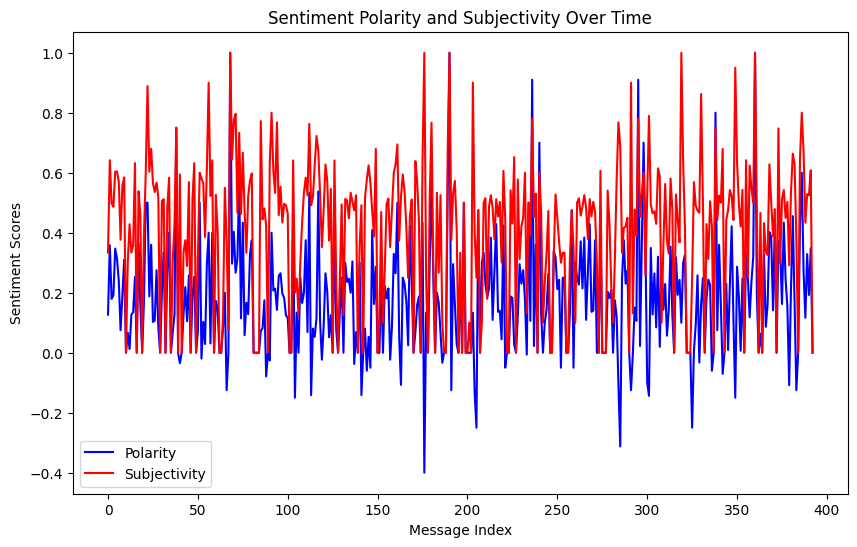

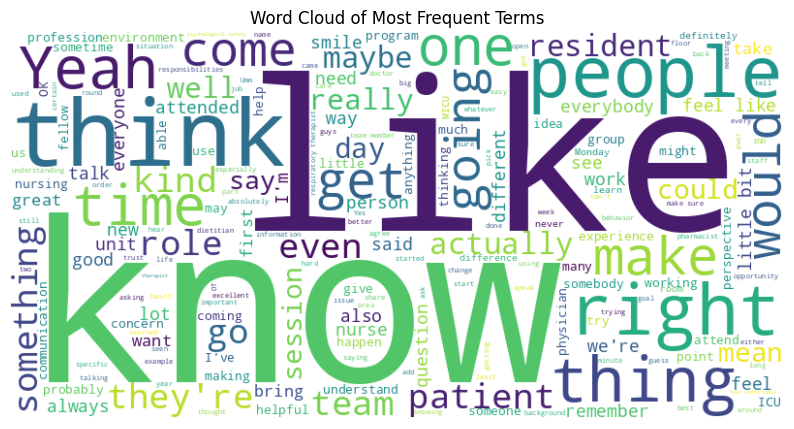

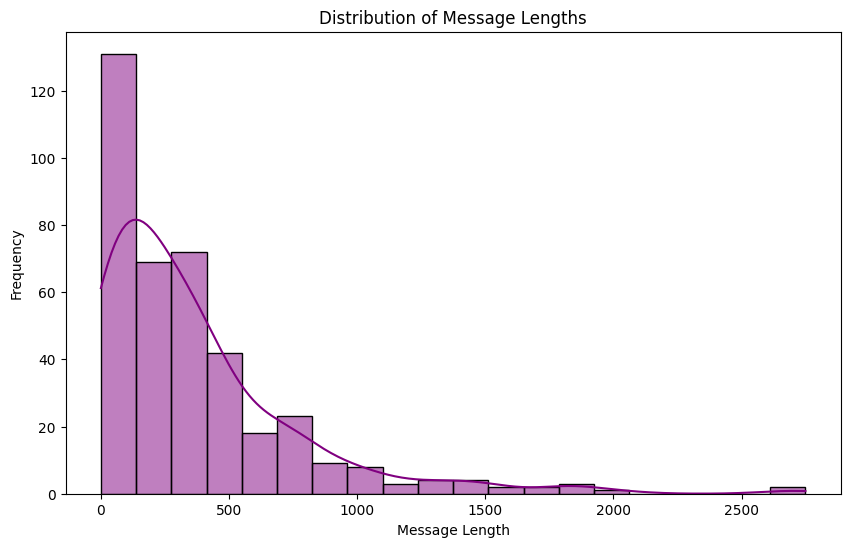

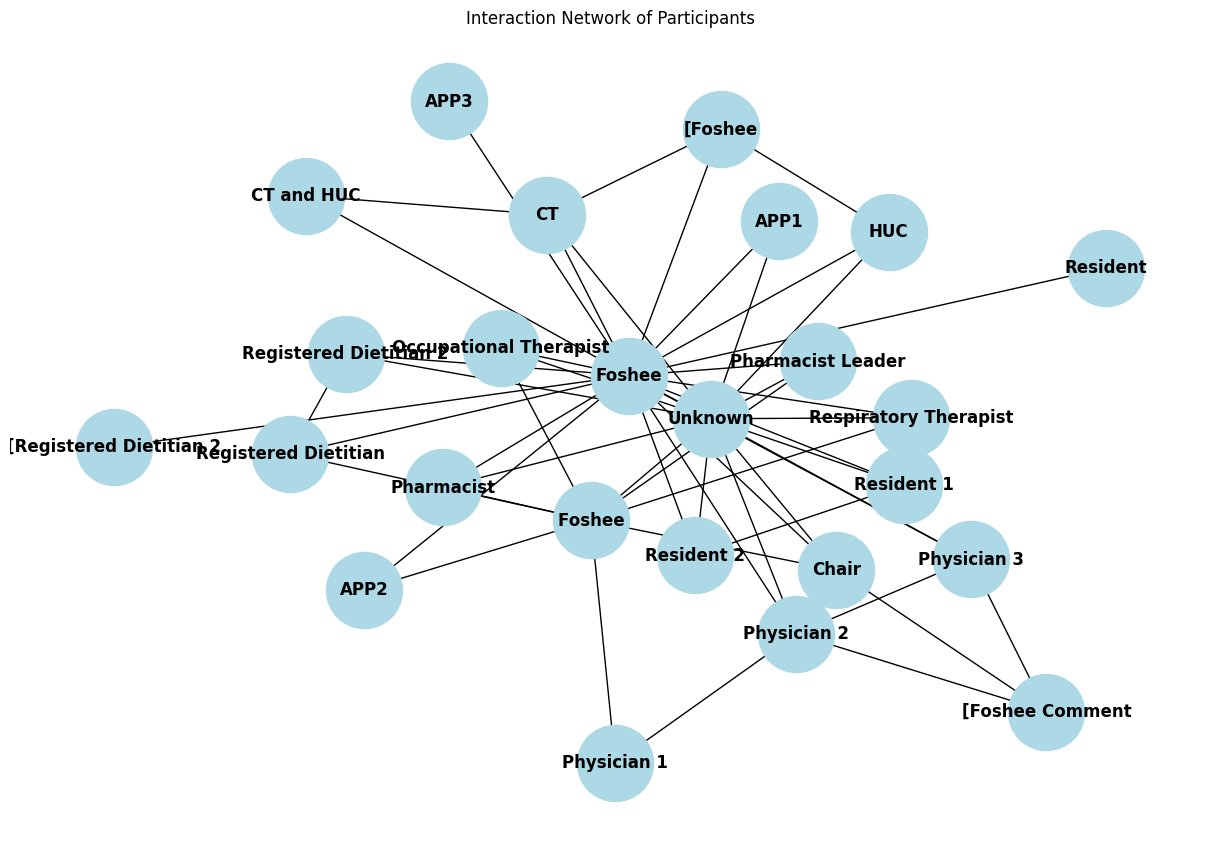

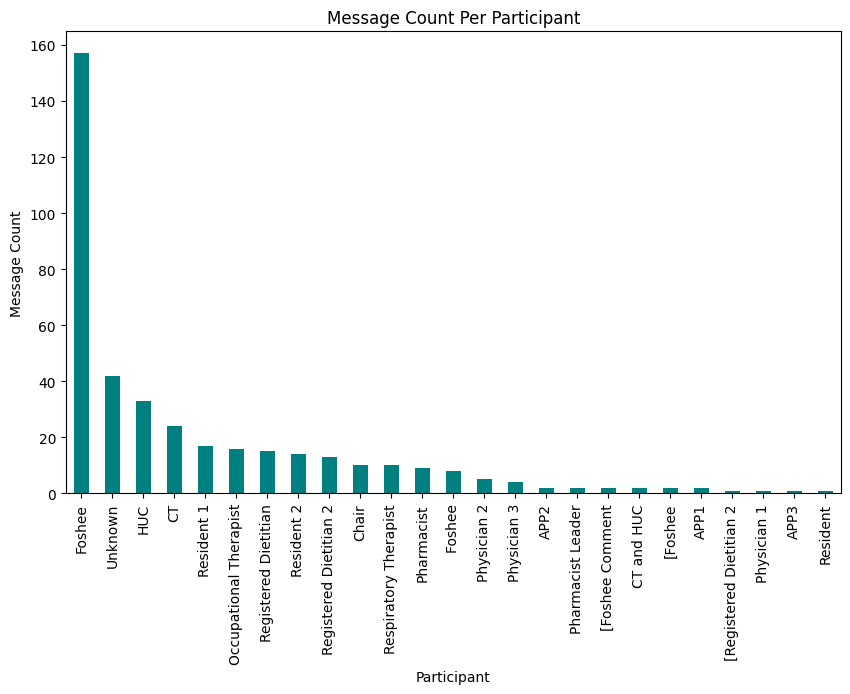

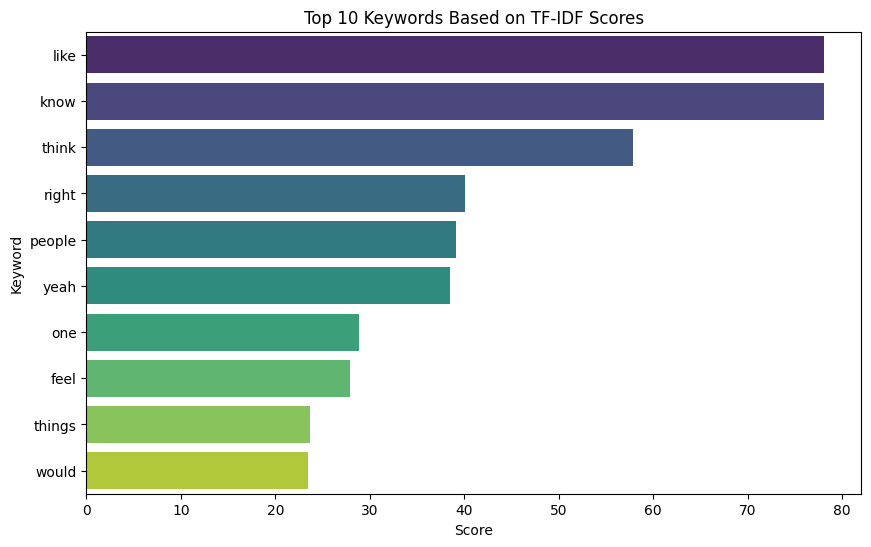

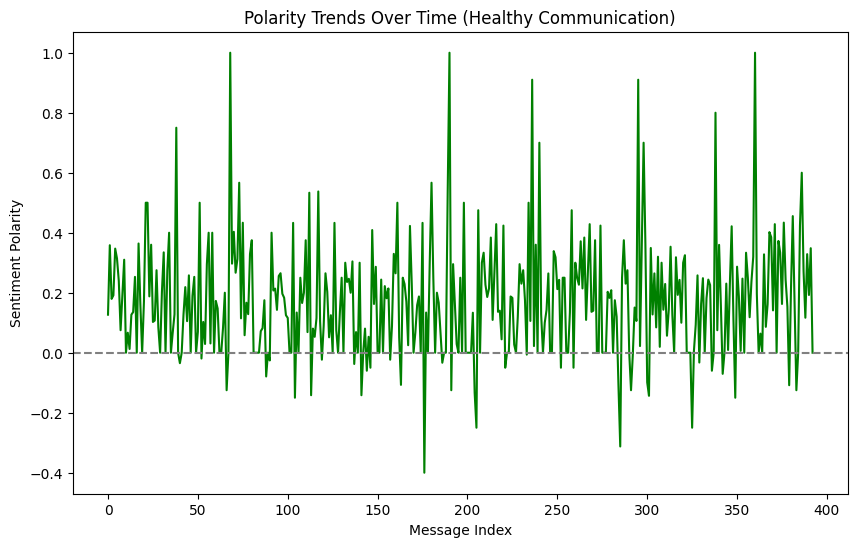

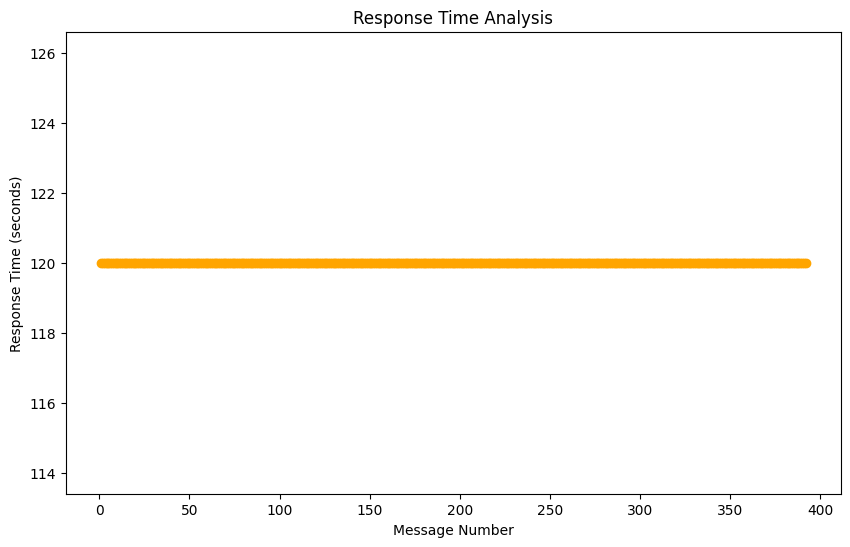

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from datetime import datetime
from wordcloud import WordCloud
import networkx as nx
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Ensure NLTK resources are downloaded
nltk.download('stopwords')

# 1. Load and Preprocess Data
# Assuming "merged.txt" contains messages with participant names included
with open('merged.txt', 'r') as file:
    lines = file.readlines()

# Splitting participant names and messages if the format is "Participant: Message"
data = []
for line in lines:
    if ":" in line:
        participant, message = line.split(":", 1)
        data.append((participant.strip(), message.strip()))
    else:
        data.append(("Unknown", line.strip()))

# Convert to DataFrame
data = pd.DataFrame(data, columns=['participant', 'message'])

# Check the length of messages
print("Number of messages:", len(data))

# Sentiment Analysis
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

data[['polarity', 'subjectivity']] = data['message'].apply(lambda x: pd.Series(analyze_sentiment(x)))

# 2. Plot Sentiment Polarity and Subjectivity Over Time
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['polarity'], label='Polarity', color='blue')
plt.plot(data.index, data['subjectivity'], label='Subjectivity', color='red')
plt.xlabel('Message Index')
plt.ylabel('Sentiment Scores')
plt.title('Sentiment Polarity and Subjectivity Over Time')
plt.legend()
plt.show()

# 3. Word Cloud for Frequent Keywords
text = " ".join(data['message'])
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=set(stopwords.words('english'))).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Terms')
plt.show()

# 4. Message Length Analysis
data['message_length'] = data['message'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(data['message_length'], bins=20, kde=True, color='purple')
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

# 5. Interaction Network of Participants
G = nx.Graph()

# Filter out specific categories or placeholders from participants
data = data[~data['participant'].str.contains(r'\[Comment\]|What would be the areas you would want|What is not good communication|is there a formal process of communication', case=False, na=False)]

# Create edges based on sender and receiver
for i in range(1, len(data)):
    sender = data['participant'].iloc[i - 1]
    receiver = data['participant'].iloc[i]
    if sender != receiver:  # Avoid self-loops
        G.add_edge(sender, receiver)

# Plot the interaction network
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_size=3000, node_color='lightblue', font_size=12, font_weight='bold')
plt.title('Interaction Network of Participants')
plt.show()

# 6. Message Frequency Per Participant
message_count = data['participant'].value_counts()

plt.figure(figsize=(10, 6))
message_count.plot(kind='bar', color='teal')
plt.title('Message Count Per Participant')
plt.xlabel('Participant')
plt.ylabel('Message Count')
plt.show()

# 7. Top Keywords using TF-IDF
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'), max_features=20)
tfidf_matrix = vectorizer.fit_transform(data['message'])
tfidf_scores = tfidf_matrix.sum(axis=0).A1
terms = vectorizer.get_feature_names_out()

# Create DataFrame for TF-IDF scores
keywords_df = pd.DataFrame(list(zip(terms, tfidf_scores)), columns=['Keyword', 'Score'])
keywords_df = keywords_df.sort_values(by='Score', ascending=False)

# Plot top 10 keywords
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Keyword', data=keywords_df.head(10), palette='viridis')
plt.title('Top 10 Keywords Based on TF-IDF Scores')
plt.show()

# 8. Polarity Trends for Healthy Communication
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['polarity'], label='Polarity', color='green')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Message Index')
plt.ylabel('Sentiment Polarity')
plt.title('Polarity Trends Over Time (Healthy Communication)')
plt.show()

# 9. Response Time Analysis (Simulated Timestamps)
timestamps = [datetime(2024, 11, 1, 10, 0) + pd.Timedelta(minutes=2 * i) for i in range(len(data))]
response_times = [(timestamps[i] - timestamps[i - 1]).total_seconds() for i in range(1, len(timestamps))]

# Plot response times
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(response_times) + 1), response_times, marker='o', color='orange')
plt.xlabel('Message Number')
plt.ylabel('Response Time (seconds)')
plt.title('Response Time Analysis')
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Number of messages: 393


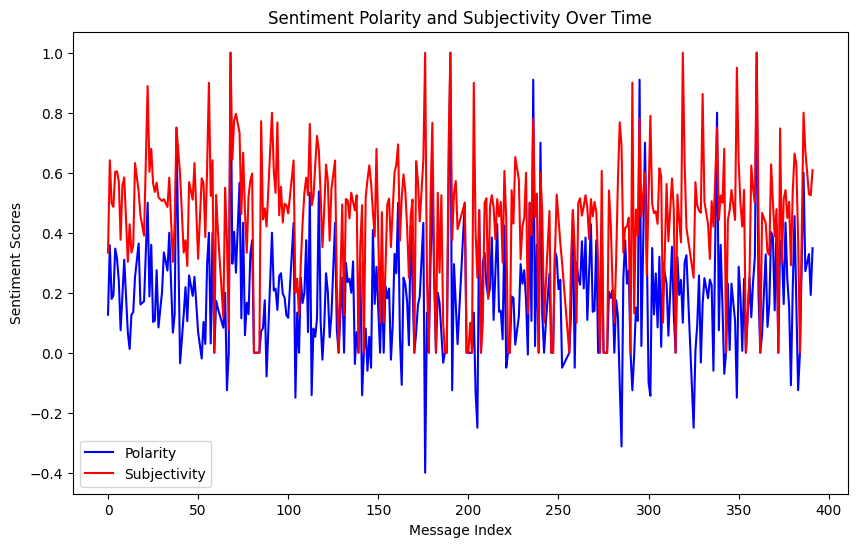

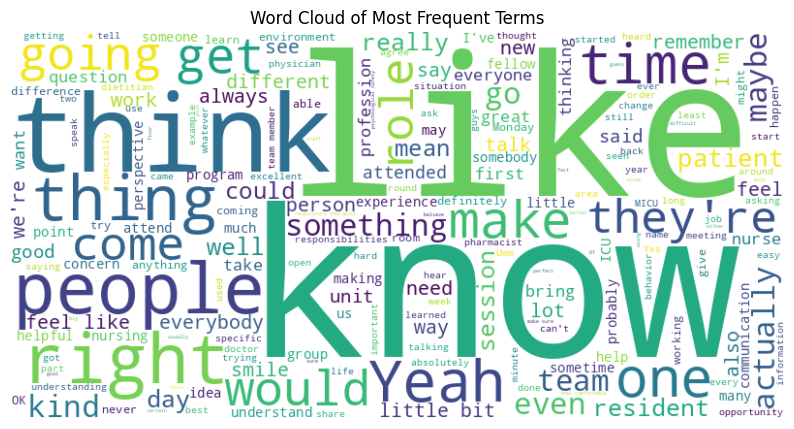

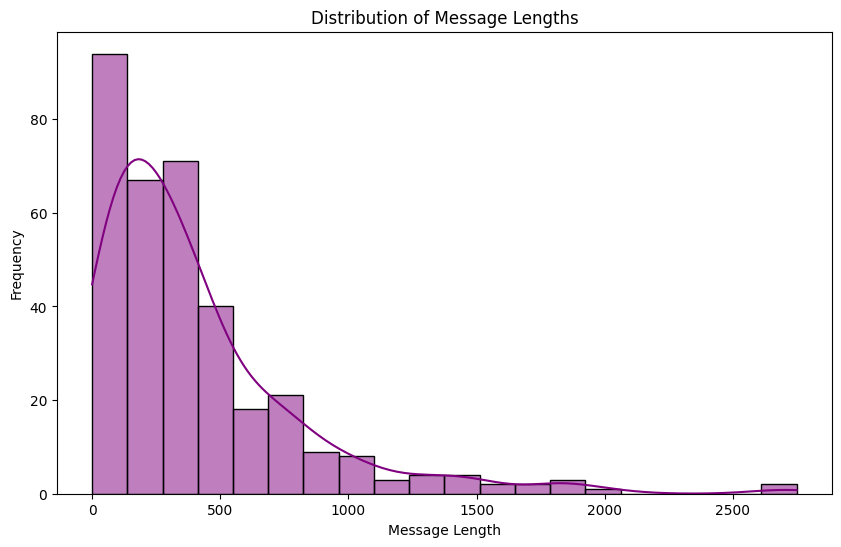

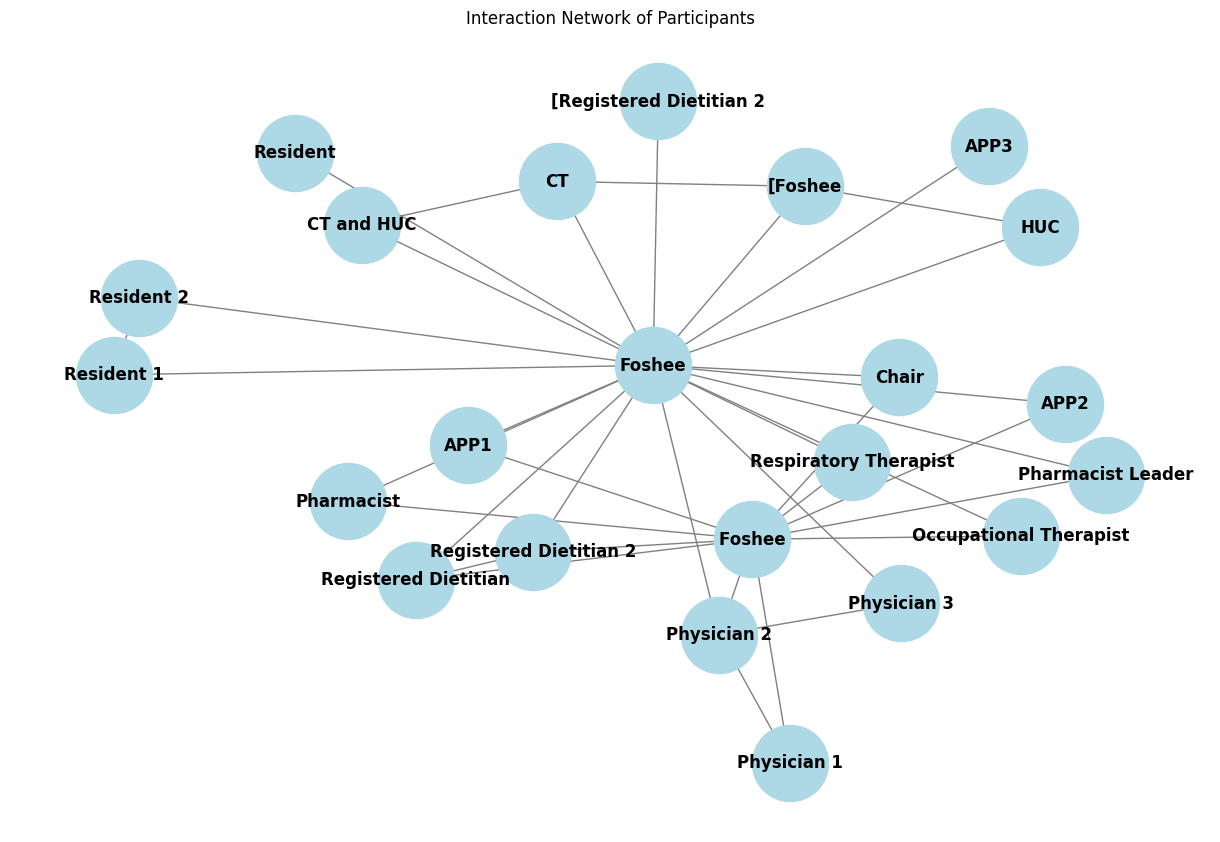

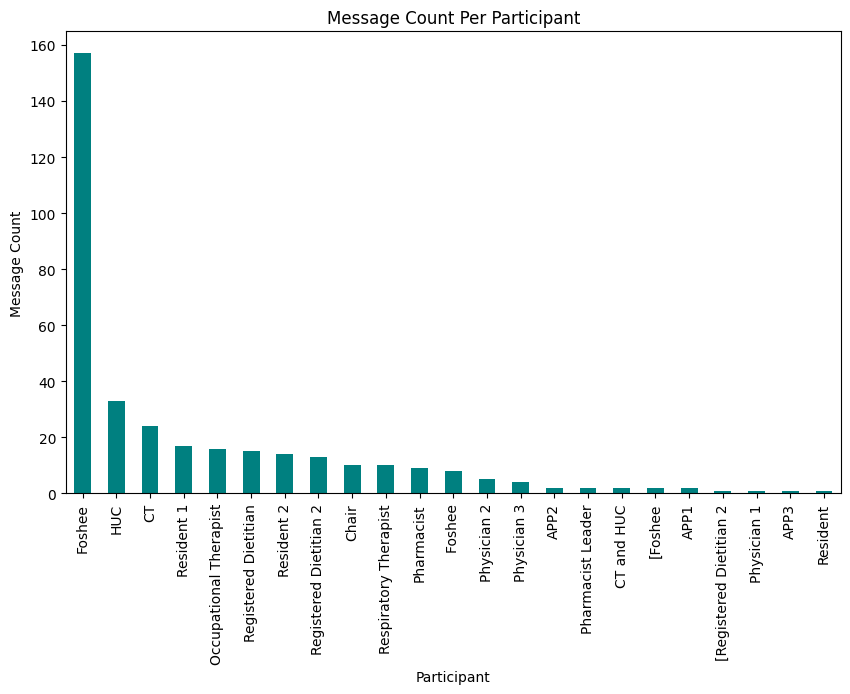

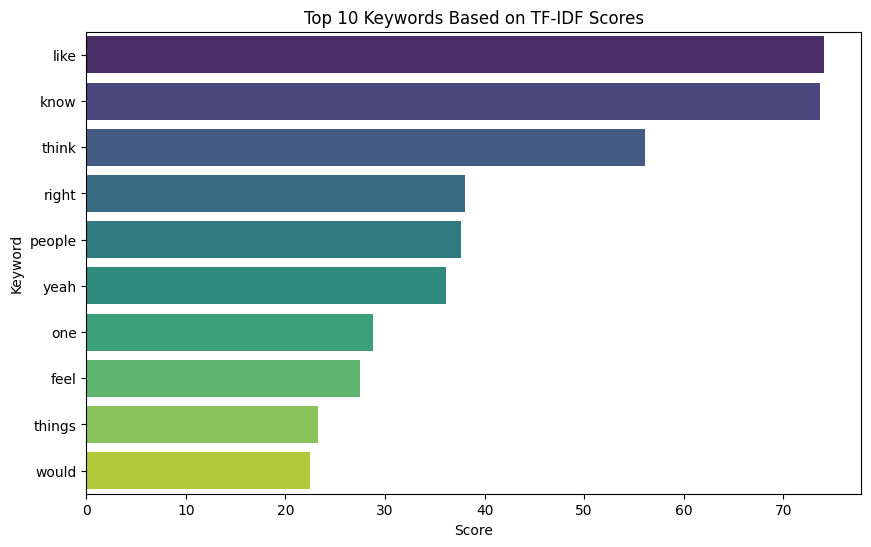

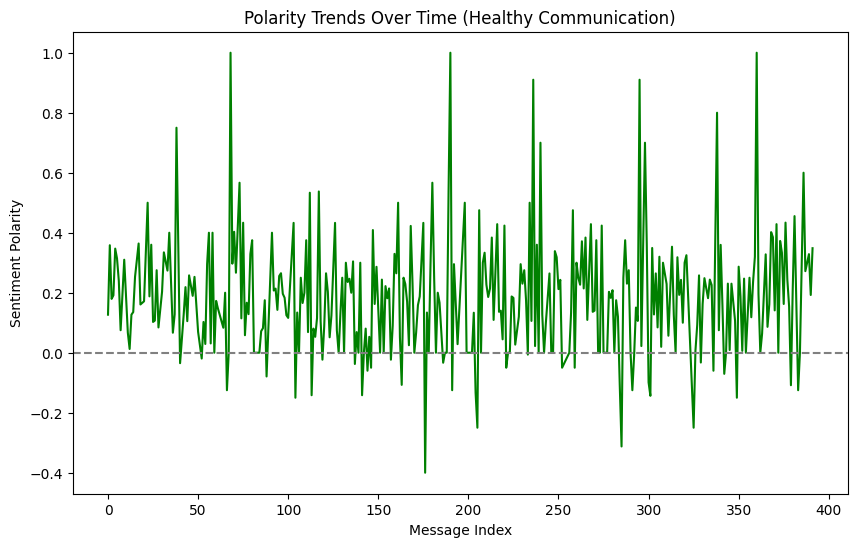

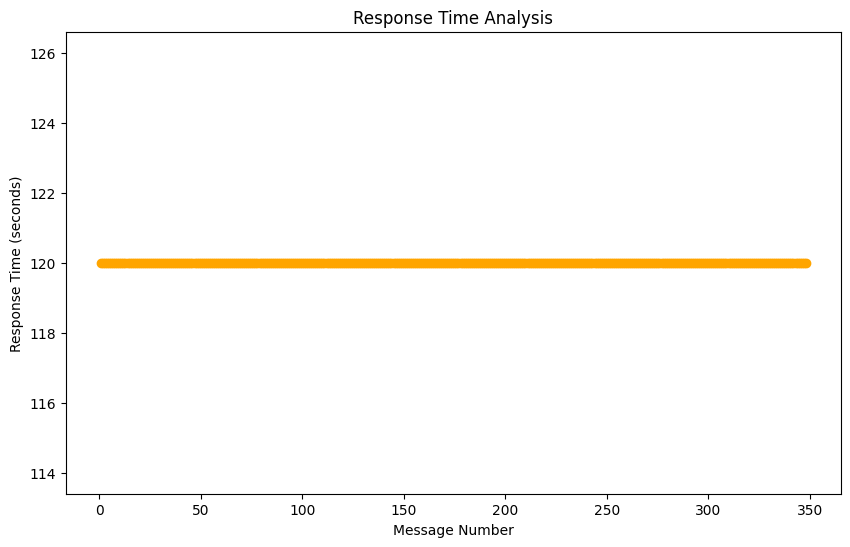

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from datetime import datetime
from wordcloud import WordCloud
import networkx as nx
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Ensure NLTK resources are downloaded
nltk.download('stopwords')

# 1. Load and Preprocess Data
# Assuming "merged.txt" contains messages with participant names included
with open('merged.txt', 'r') as file:
    lines = file.readlines()

# Splitting participant names and messages if the format is "Participant: Message"
data = []
for line in lines:
    if ":" in line:
        participant, message = line.split(":", 1)
        data.append((participant.strip(), message.strip()))
    else:
        data.append(("Unknown", line.strip()))

# Convert to DataFrame
data = pd.DataFrame(data, columns=['participant', 'message'])

# Check the length of messages
print("Number of messages:", len(data))

# Remove placeholder participants or undesired roles
valid_participants = ~data['participant'].str.contains(r'\[Comment\]|Unknown|Comment|What would be the areas you would want|What is not good communication|is there a formal process of communication', case=False, na=False)
data = data[valid_participants & ~data['participant'].str.isnumeric()]

# Sentiment Analysis
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

data[['polarity', 'subjectivity']] = data['message'].apply(lambda x: pd.Series(analyze_sentiment(x)))

# 2. Plot Sentiment Polarity and Subjectivity Over Time
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['polarity'], label='Polarity', color='blue')
plt.plot(data.index, data['subjectivity'], label='Subjectivity', color='red')
plt.xlabel('Message Index')
plt.ylabel('Sentiment Scores')
plt.title('Sentiment Polarity and Subjectivity Over Time')
plt.legend()
plt.show()

# 3. Word Cloud for Frequent Keywords
text = " ".join(data['message'])
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=set(stopwords.words('english'))).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Terms')
plt.show()

# 4. Message Length Analysis
data['message_length'] = data['message'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(data['message_length'], bins=20, kde=True, color='purple')
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

# 5. Interaction Network of Participants
G = nx.Graph()

# Create edges based on sender and receiver
for i in range(1, len(data)):
    sender = data['participant'].iloc[i - 1]
    receiver = data['participant'].iloc[i]
    if sender != receiver:  # Avoid self-loops
        G.add_edge(sender, receiver)

# Improve network layout to avoid overlaps
pos = nx.spring_layout(G, k=0.3, seed=42)  # k controls spacing between nodes, seed ensures consistency

# Plot the interaction network
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=12, font_weight='bold', edge_color='gray')
plt.title('Interaction Network of Participants')
plt.show()

# 6. Message Frequency Per Participant
message_count = data['participant'].value_counts()

plt.figure(figsize=(10, 6))
message_count.plot(kind='bar', color='teal')
plt.title('Message Count Per Participant')
plt.xlabel('Participant')
plt.ylabel('Message Count')
plt.show()

# 7. Top Keywords using TF-IDF
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'), max_features=20)
tfidf_matrix = vectorizer.fit_transform(data['message'])
tfidf_scores = tfidf_matrix.sum(axis=0).A1
terms = vectorizer.get_feature_names_out()

# Create DataFrame for TF-IDF scores
keywords_df = pd.DataFrame(list(zip(terms, tfidf_scores)), columns=['Keyword', 'Score'])
keywords_df = keywords_df.sort_values(by='Score', ascending=False)

# Plot top 10 keywords
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Keyword', data=keywords_df.head(10), palette='viridis')
plt.title('Top 10 Keywords Based on TF-IDF Scores')
plt.show()

# 8. Polarity Trends for Healthy Communication
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['polarity'], label='Polarity', color='green')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Message Index')
plt.ylabel('Sentiment Polarity')
plt.title('Polarity Trends Over Time (Healthy Communication)')
plt.show()

# 9. Response Time Analysis (Simulated Timestamps)
timestamps = [datetime(2024, 11, 1, 10, 0) + pd.Timedelta(minutes=2 * i) for i in range(len(data))]
response_times = [(timestamps[i] - timestamps[i - 1]).total_seconds() for i in range(1, len(timestamps))]

# Plot response times
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(response_times) + 1), response_times, marker='o', color='orange')
plt.xlabel('Message Number')
plt.ylabel('Response Time (seconds)')
plt.title('Response Time Analysis')
plt.show()


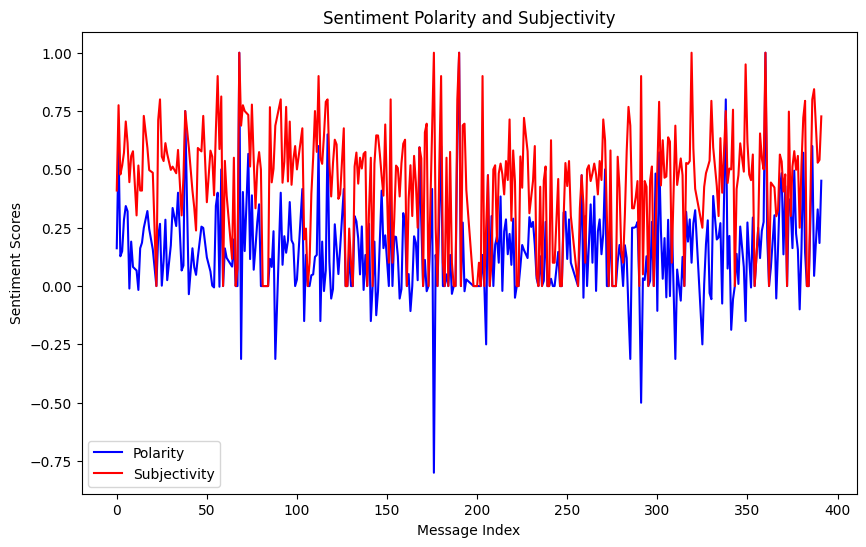

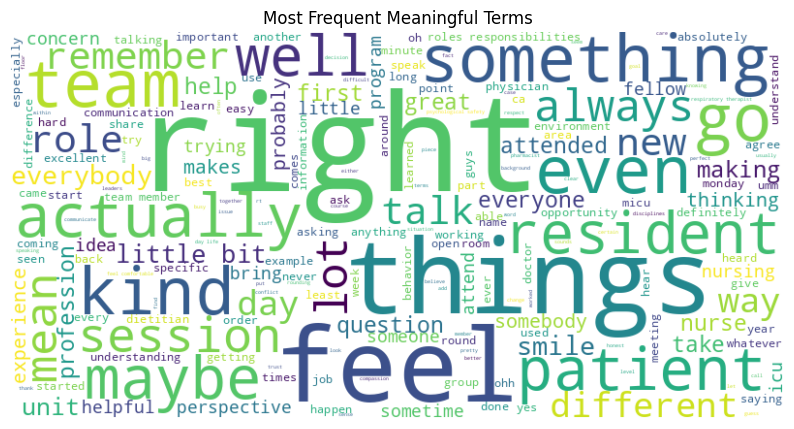

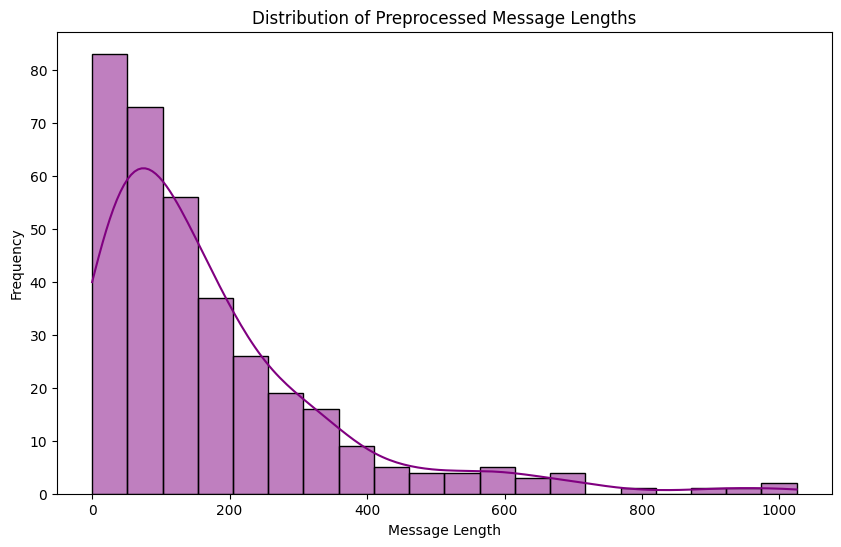

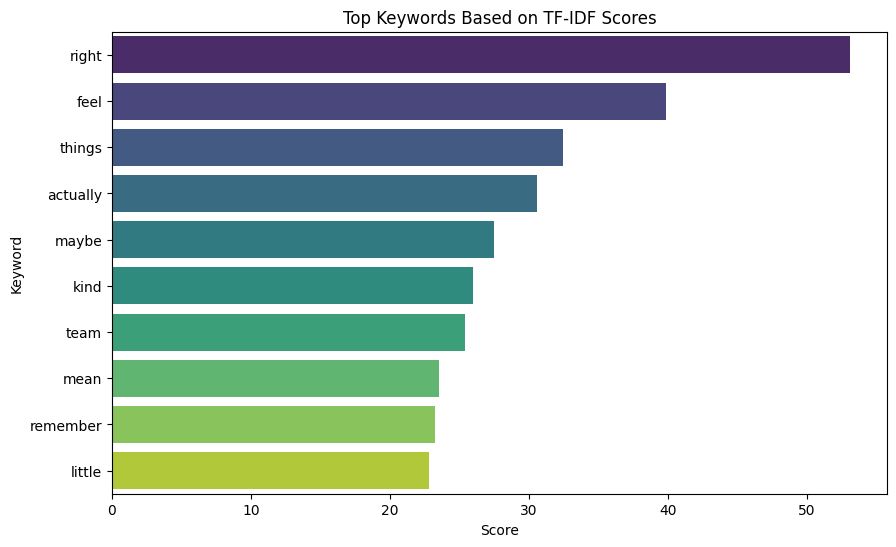

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from datetime import datetime
from wordcloud import WordCloud
import networkx as nx
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

# Download necessary NLTK resources
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)

# Comprehensive list of stop words
comprehensive_stopwords = set(stopwords.words('english')).union({
    # Additional conversational and generic words
    'thing', 'yeah', 'us', 'going', 'gonna', 'like', 'really', 'just', 'know',
    'get', 'got', 'would', 'could', 'can', 'say', 'said', 'see', 'come', 'make',
    'made', 'want', 'needs', 'need', 'think', 'thought', 'tell', 'told', 'okay',
    'ok', 'hey', 'hi', 'hello', 'sure', 'may', 'might', 'much', 'many', 'also',
    'one', 'two', 'three', 'still', 'time', 'now', 'work', 'good', 'bad', 'there',
    'here', 'have', 'has', 'had', 'do', 'does', 'did', 'will', 'would', 'should',
    'could', 'people', 'person', 'some', 'any', 'all', 'most', 'other', 'such'
})

def advanced_text_preprocessing(text):
    """
    Advanced text preprocessing function
    - Convert to lowercase
    - Tokenize
    - Remove stop words
    - Remove non-alphanumeric tokens
    - Remove single-character words
    """
    # Tokenize and lowercase
    tokens = word_tokenize(text.lower())

    # Advanced filtering
    filtered_tokens = [
        token for token in tokens
        if (token.isalnum() and  # Only alphanumeric
            token not in comprehensive_stopwords and  # Remove stop words
            len(token) > 1)  # Remove single-character words
    ]

    return ' '.join(filtered_tokens)

# 1. Load and Preprocess Data
def load_text_data(filename='merged.txt'):
    try:
        with open(filename, 'r') as file:
            lines = file.readlines()

        data = []
        for line in lines:
            if ":" in line:
                participant, message = line.split(":", 1)
                data.append((participant.strip(), message.strip()))
            else:
                data.append(("Unknown", line.strip()))

        # Convert to DataFrame
        df = pd.DataFrame(data, columns=['participant', 'message'])

        # Remove placeholder or undesired participants
        valid_participants = ~df['participant'].str.contains(
            r'\[Comment\]|Unknown|Comment|What would be the areas you would want|What is not good communication|is there a formal process of communication',
            case=False,
            na=False
        )
        df = df[valid_participants & ~df['participant'].str.isnumeric()]

        return df
    except FileNotFoundError:
        print(f"Error: File {filename} not found.")
        return pd.DataFrame()

# Load data
data = load_text_data()

# Preprocess messages
data['filtered_message'] = data['message'].apply(advanced_text_preprocessing)

# Sentiment Analysis Function
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply sentiment analysis
data[['polarity', 'subjectivity']] = data['filtered_message'].apply(
    lambda x: pd.Series(analyze_sentiment(x))
)

# Visualization Functions
def create_plots(data):
    # 1. Sentiment Polarity and Subjectivity
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['polarity'], label='Polarity', color='blue')
    plt.plot(data.index, data['subjectivity'], label='Subjectivity', color='red')
    plt.xlabel('Message Index')
    plt.ylabel('Sentiment Scores')
    plt.title('Sentiment Polarity and Subjectivity')
    plt.legend()
    plt.show()

    # 2. Word Cloud
    text = " ".join(data['filtered_message'])
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=comprehensive_stopwords
    ).generate(text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Most Frequent Meaningful Terms')
    plt.show()

    # 3. Message Length Distribution
    data['message_length'] = data['filtered_message'].apply(len)
    plt.figure(figsize=(10, 6))
    sns.histplot(data['message_length'], bins=20, kde=True, color='purple')
    plt.title('Distribution of Preprocessed Message Lengths')
    plt.xlabel('Message Length')
    plt.ylabel('Frequency')
    plt.show()

    # 4. TF-IDF Top Keywords
    vectorizer = TfidfVectorizer(stop_words='english', max_features=15)
    tfidf_matrix = vectorizer.fit_transform(data['filtered_message'])
    tfidf_scores = tfidf_matrix.sum(axis=0).A1
    terms = vectorizer.get_feature_names_out()

    keywords_df = pd.DataFrame(
        list(zip(terms, tfidf_scores)),
        columns=['Keyword', 'Score']
    ).sort_values(by='Score', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Score', y='Keyword', data=keywords_df.head(10), palette='viridis')
    plt.title('Top Keywords Based on TF-IDF Scores')
    plt.show()

# Generate visualizations
create_plots(data)

In [ ]:
!pip install gensim

In [ ]:
!pip install pandas numpy matplotlib textblob


Summary Statistics:
average_score: 2.00
max_score: 2.00
min_score: 2.00
average_sentiment: 0.19
total_aspects: 1.00

Key Insights:
Top scoring aspects (score > 2.0):

Sentiment analysis:
- 1 aspects have positive sentiment
- 0 aspects have negative sentiment


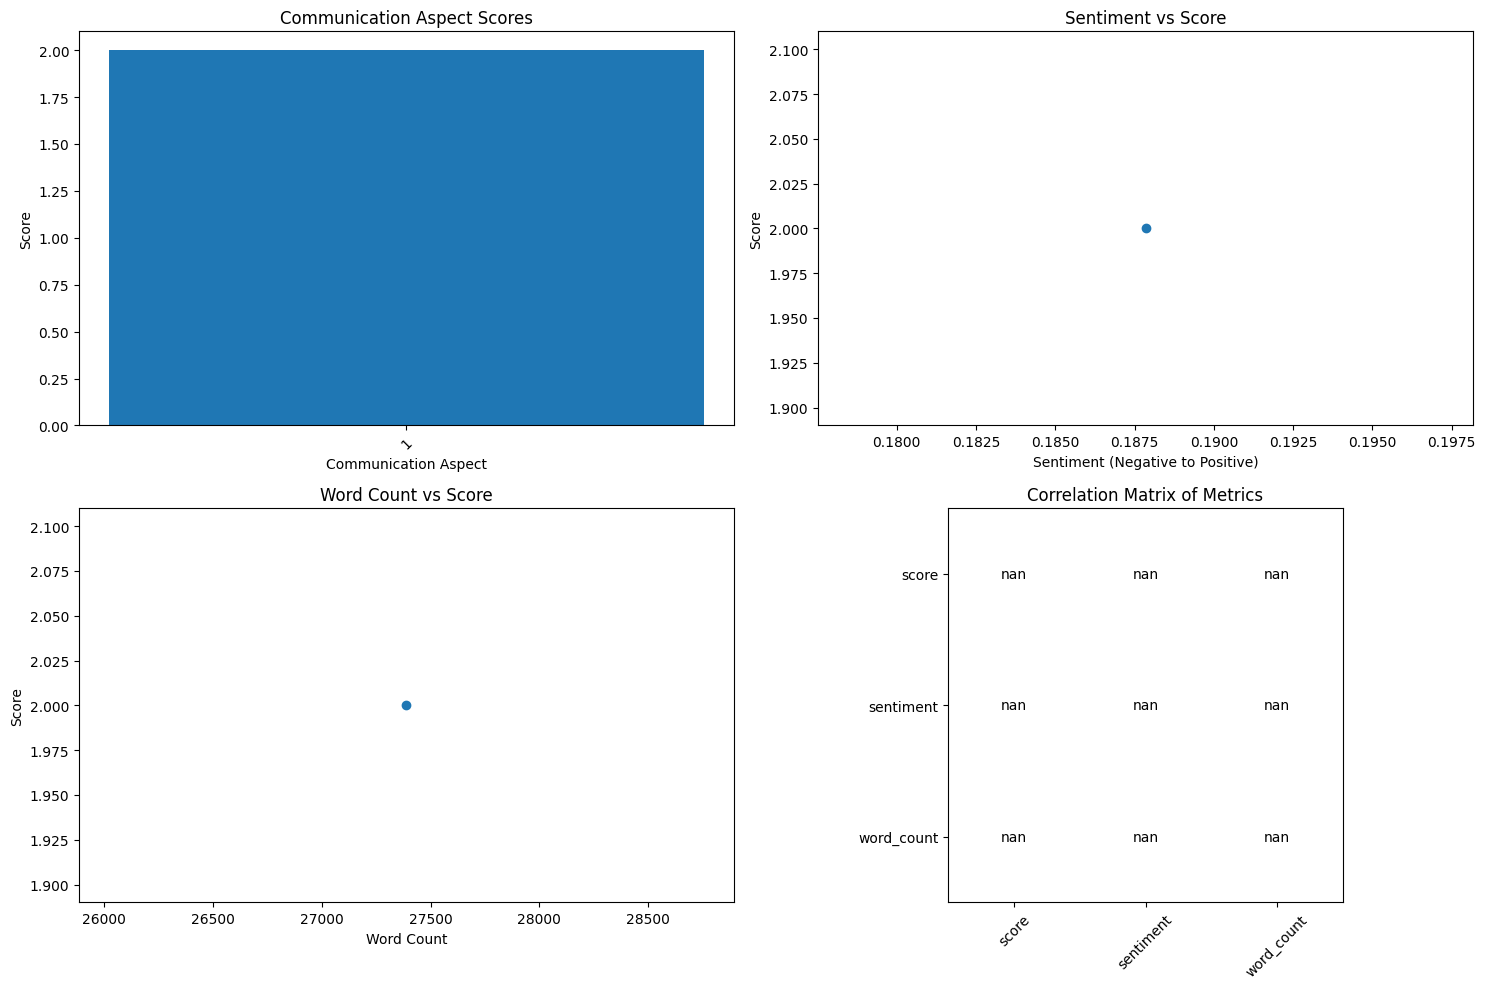

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import re

def parse_content(filepath):
    """Parse the communication content from the text file"""
    with open(filepath, 'r', encoding='utf-8') as file:
        content = file.read()

    # Split into sections and parse
    sections = content.split('\n.\n')

    data = []
    for section in sections:
        if not section.strip():
            continue

        # Extract numbers from the text
        numbers = re.findall(r'\d+', section)
        score = int(numbers[-1]) if numbers else 0

        # Clean the text
        text = re.sub(r'\d+', '', section).strip()

        data.append({
            'text': text,
            'score': score,
            'sentiment': TextBlob(text).sentiment.polarity,
            'word_count': len(text.split())
        })

    return pd.DataFrame(data)

def create_visualizations(df):
    """Create multiple visualizations for the communication analysis"""
    # Create a figure with subplots
    fig = plt.figure(figsize=(15, 10))

    # 1. Score Distribution
    ax1 = fig.add_subplot(221)
    indices = np.arange(len(df))
    ax1.bar(indices, df.sort_values('score', ascending=False)['score'])
    ax1.set_title('Communication Aspect Scores')
    ax1.set_xlabel('Communication Aspect')
    ax1.set_ylabel('Score')
    plt.xticks(indices, range(1, len(df) + 1), rotation=45)

    # 2. Sentiment Analysis
    ax2 = fig.add_subplot(222)
    ax2.scatter(df['sentiment'], df['score'])
    ax2.set_title('Sentiment vs Score')
    ax2.set_xlabel('Sentiment (Negative to Positive)')
    ax2.set_ylabel('Score')

    # 3. Word Count Analysis
    ax3 = fig.add_subplot(223)
    ax3.scatter(df['word_count'], df['score'])
    ax3.set_title('Word Count vs Score')
    ax3.set_xlabel('Word Count')
    ax3.set_ylabel('Score')

    # 4. merged Metrics Heatmap
    ax4 = fig.add_subplot(224)
    correlation_matrix = df[['score', 'sentiment', 'word_count']].corr()
    im = ax4.imshow(correlation_matrix, cmap='coolwarm')
    ax4.set_title('Correlation Matrix of Metrics')

    # Add correlation values as text
    for i in range(len(correlation_matrix.index)):
        for j in range(len(correlation_matrix.columns)):
            text = ax4.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                          ha="center", va="center", color="black")

    # Set labels for correlation matrix
    ax4.set_xticks(range(len(correlation_matrix.columns)))
    ax4.set_yticks(range(len(correlation_matrix.index)))
    ax4.set_xticklabels(correlation_matrix.columns, rotation=45)
    ax4.set_yticklabels(correlation_matrix.index)

    plt.tight_layout()
    return plt

def analyze_communications(filepath):
    """Main function to analyze communications"""
    # Parse and analyze the content
    df = parse_content(filepath)

    # Create visualizations
    plt = create_visualizations(df)

    # Generate summary statistics
    summary = {
        'average_score': df['score'].mean(),
        'max_score': df['score'].max(),
        'min_score': df['score'].min(),
        'average_sentiment': df['sentiment'].mean(),
        'total_aspects': len(df)
    }

    # Generate insights
    insights = []

    # Score-based insights
    high_score_aspects = df[df['score'] > df['score'].mean()]
    insights.append(f"Top scoring aspects (score > {df['score'].mean():.1f}):")
    for _, row in high_score_aspects.iterrows():
        insights.append(f"- {row['text'][:100]}... (Score: {row['score']})")

    # Sentiment-based insights
    insights.append("\nSentiment analysis:")
    positive_aspects = df[df['sentiment'] > 0]
    negative_aspects = df[df['sentiment'] < 0]
    insights.append(f"- {len(positive_aspects)} aspects have positive sentiment")
    insights.append(f"- {len(negative_aspects)} aspects have negative sentiment")

    return df, summary, insights, plt

if __name__ == "__main__":
    # Run the analysis
    try:
        df, summary, insights, plt = analyze_communications('merged.txt')

        # Print summary and insights
        print("\nSummary Statistics:")
        for key, value in summary.items():
            print(f"{key}: {value:.2f}")

        print("\nKey Insights:")
        for insight in insights:
            print(insight)

        # Show visualizations
        plt.show()

    except FileNotFoundError:
        print("Error: Could not find 'merged.txt'. Please make sure the file exists in the current directory.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

In [50]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re
from nltk.corpus import stopwords
import nltk

def generate_word_cloud(text):
    """
    Generate a word cloud from input text with custom processing
    """
    # Download required NLTK data
    try:
        nltk.data.find('corpora/stopwords')
    except LookupError:
        nltk.download('stopwords')

    # Get stop words and add custom ones relevant to this context
    stop_words = set(stopwords.words('english'))
    custom_stops = {'like', 'know', 'think', 'one', 'really', 'get', 'got', 'make',
                   'right', 'going', 'said', 'went', 'made', 'actually', 'also',
                   'would', 'could', 'well', 'even', 'much', 'take', 'way',
                   'end', 'first', 'session'}
    stop_words.update(custom_stops)

    # Clean text
    def clean_text(text):
        # Convert to lowercase
        text = text.lower()
        # Remove special characters and digits
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Remove extra whitespace
        text = ' '.join(text.split())
        return text

    # Clean and process text
    cleaned_text = clean_text(text)

    # Create word frequency distribution
    words = cleaned_text.split()
    word_freq = Counter([w for w in words if w not in stop_words and len(w) > 2])

    # Generate and configure word cloud
    wordcloud = WordCloud(
        width=1600,
        height=800,
        background_color='white',
        max_words=100,
        min_font_size=10,
        max_font_size=150,
        random_state=42
    ).generate_from_frequencies(word_freq)

    # Create figure and display
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    # Get top 20 words and their frequencies
    top_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:20]

    return wordcloud, top_words

# Read the text
with open('merged.txt', 'r') as file:
    text = file.read()

# Generate word cloud and get top words
wordcloud, top_words = generate_word_cloud(text)

# Print top 20 words and their frequencies
print("\nTop 20 most frequent words:")
print("---------------------------")
for word, freq in top_words:
    print(f"{word}: {freq}")

# Save the word cloud
plt.savefig('wordcloud.png', bbox_inches='tight', dpi=300)
plt.close()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




Top 20 most frequent words:
---------------------------
foshee: 178
people: 163
yeah: 112
feel: 95
thats: 94
things: 91
dont: 91
time: 86
theyre: 74
something: 70
kind: 69
team: 68
maybe: 66
little: 65
theres: 64
youre: 64
come: 62
resident: 61
say: 58
patient: 51


In [51]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re
from nltk.corpus import stopwords
import nltk

def generate_word_cloud(text):
    """
    Generate a word cloud from input text with enhanced stop words
    """
    # Download required NLTK data
    try:
        nltk.data.find('corpora/stopwords')
    except LookupError:
        nltk.download('stopwords')

    # Get stop words and add custom ones based on analysis
    stop_words = set(stopwords.words('english'))
    custom_stops = {
        'like', 'know', 'think', 'one', 'really', 'get', 'got', 'make',
        'right', 'going', 'said', 'went', 'made', 'actually', 'also',
        'would', 'could', 'well', 'even', 'much', 'take', 'way',
        'end', 'first', 'session', 'foshee', 'yeah', 'thats', 'dont',
        'theyre', 'kind', 'maybe', 'theres', 'youre', 'something',
        'come', 'say', 'thing', 'things', 'gonna', 'im', 'cant',
        'thats', 'ive', 'lot', 'want', 'back', 'need', 'just',
        'see', 'mean', 'okay', 'sure', 'might', 'whether'
    }
    stop_words.update(custom_stops)

    # Clean text
    def clean_text(text):
        # Convert to lowercase
        text = text.lower()
        # Remove special characters and digits
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Remove extra whitespace
        text = ' '.join(text.split())
        return text

    # Clean and process text
    cleaned_text = clean_text(text)

    # Create word frequency distribution
    words = cleaned_text.split()
    word_freq = Counter([w for w in words if w not in stop_words and len(w) > 2])

    # Generate and configure word cloud
    wordcloud = WordCloud(
        width=2000,
        height=1000,
        background_color='white',
        max_words=50,  # Reduced for clarity
        min_font_size=12,
        max_font_size=160,
        random_state=42,
        colormap='viridis'  # Using a colorful colormap
    ).generate_from_frequencies(word_freq)

    # Create figure with improved styling
    plt.figure(figsize=(24,12))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    # Get top 20 words and their frequencies
    top_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:20]

    return wordcloud, top_words

# Read the text
with open('merged.txt', 'r') as file:
    text = file.read()

# Generate word cloud and get top words
wordcloud, top_words = generate_word_cloud(text)

# Print top 20 words with improved formatting
print("\nTop 20 Most Meaningful Words")
print("=" * 30)
print(f"{'Word':<15} | {'Frequency':>10}")
print("-" * 30)
for word, freq in top_words:
    print(f"{word:<15} | {freq:>10}")

# Save the word cloud with higher resolution
plt.savefig('wordcloud_improved.png', bbox_inches='tight', dpi=300, facecolor='white')
plt.close()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




Top 20 Most Meaningful Words
Word            |  Frequency
------------------------------
people          |        163
feel            |         95
time            |         86
team            |         68
little          |         65
resident        |         61
patient         |         51
therapist       |         48
smile           |         48
bit             |         48
always          |         48
remember        |         47
day             |         46
dietitian       |         45
person          |         45
new             |         45
roles           |         44
different       |         44
work            |         44
everybody       |         43
